# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_1_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



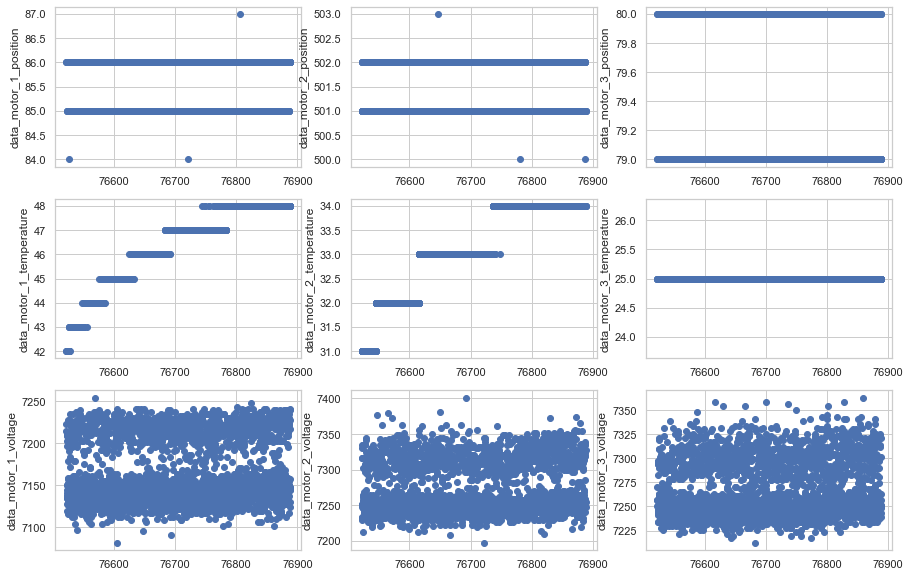

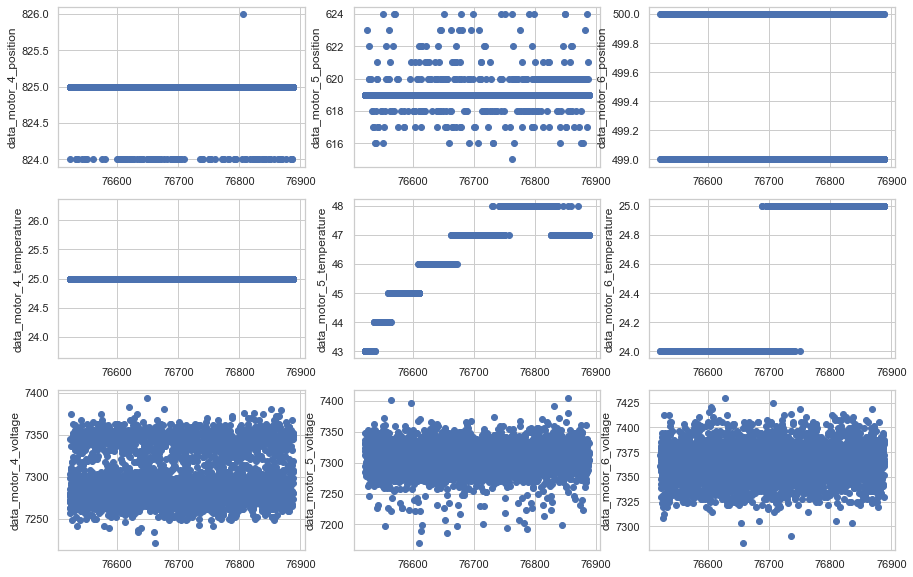

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



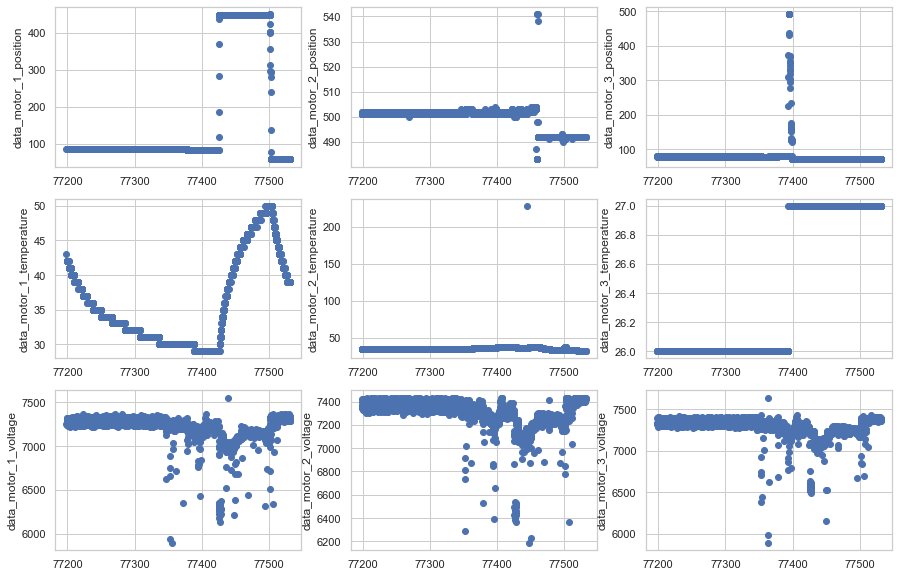

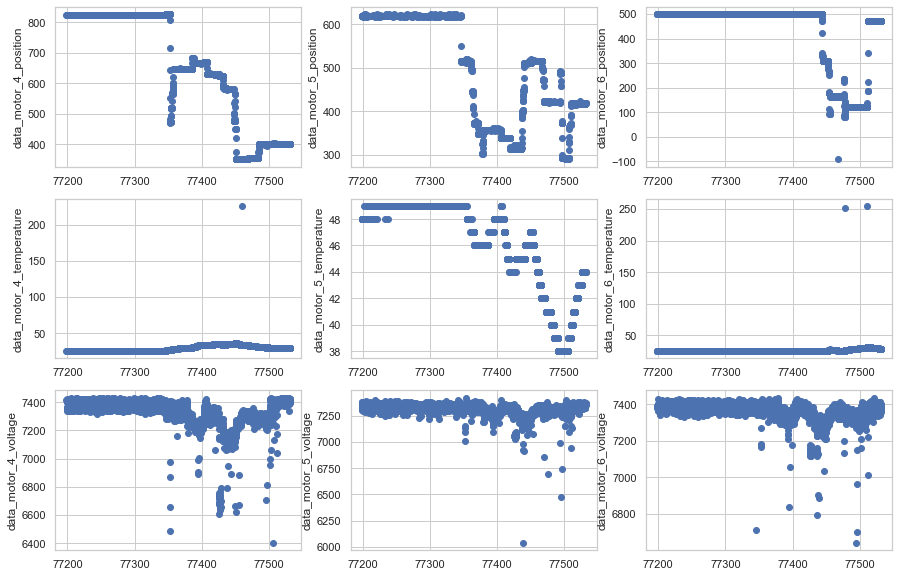

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



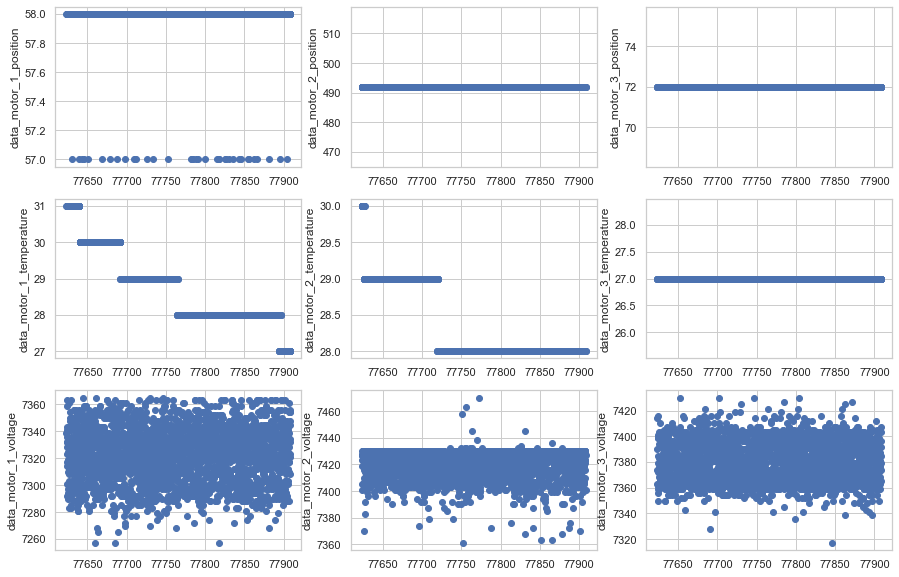

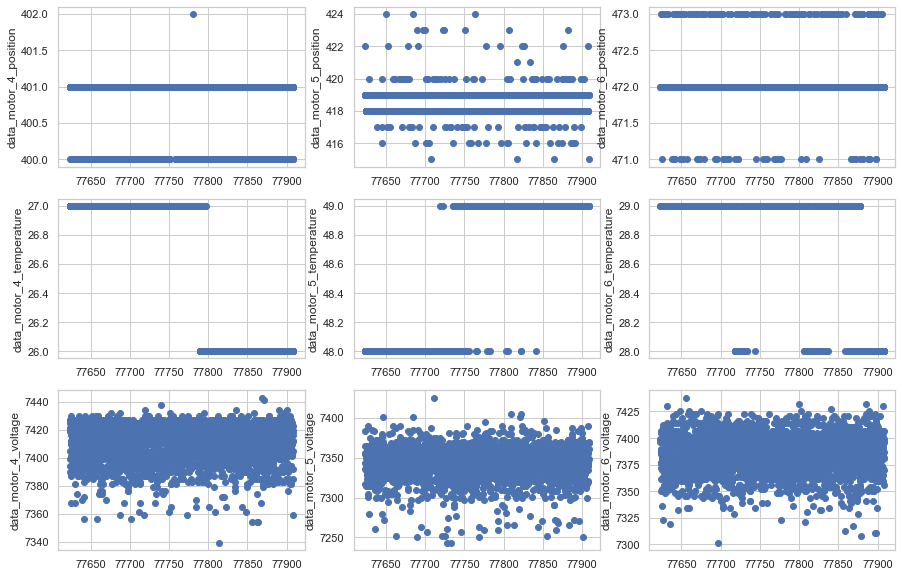

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



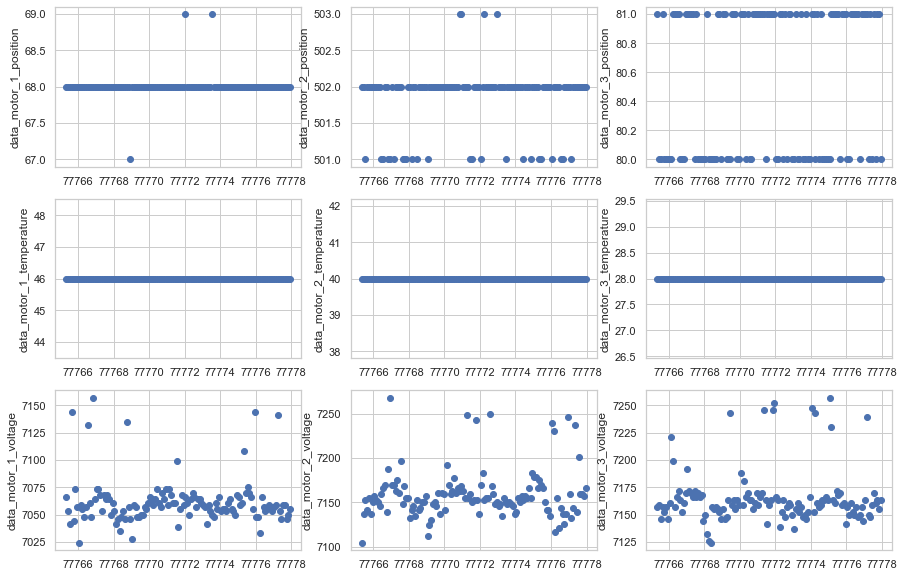

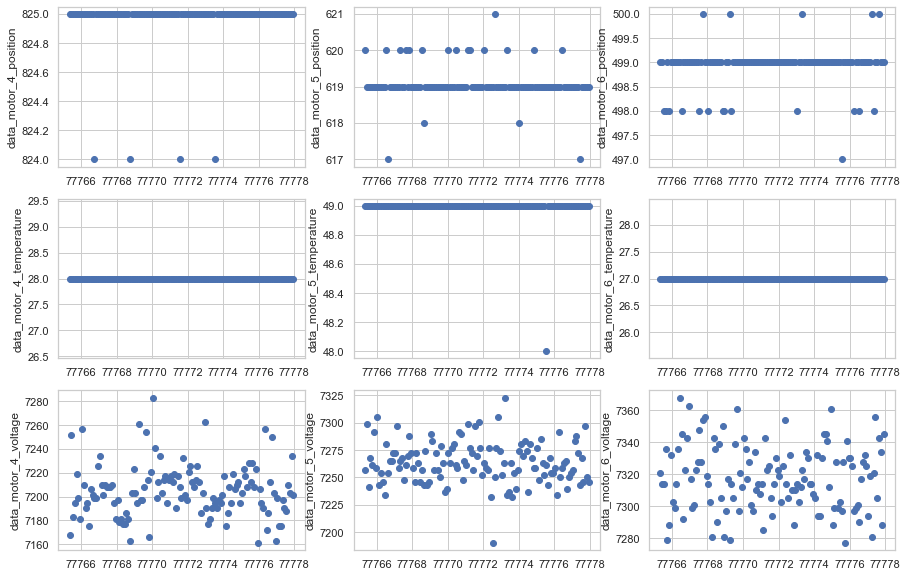

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



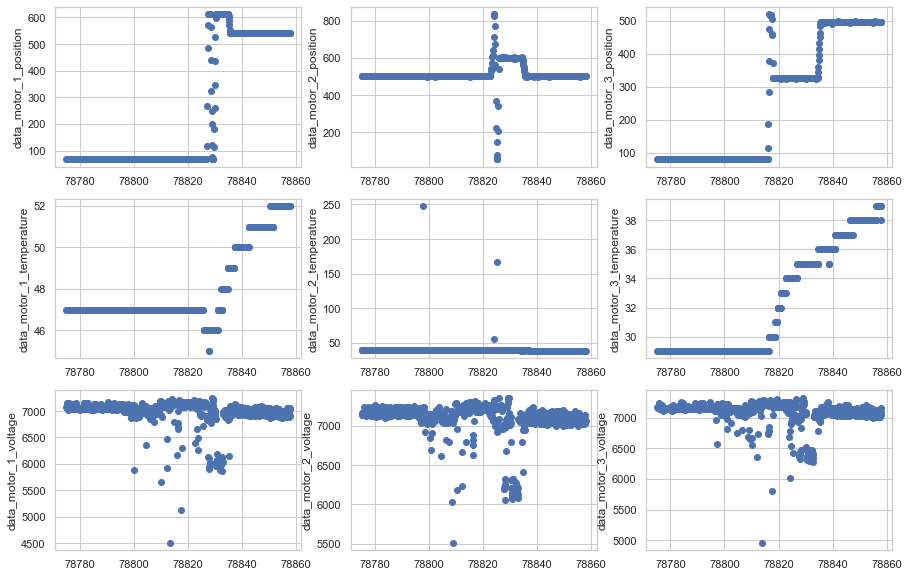

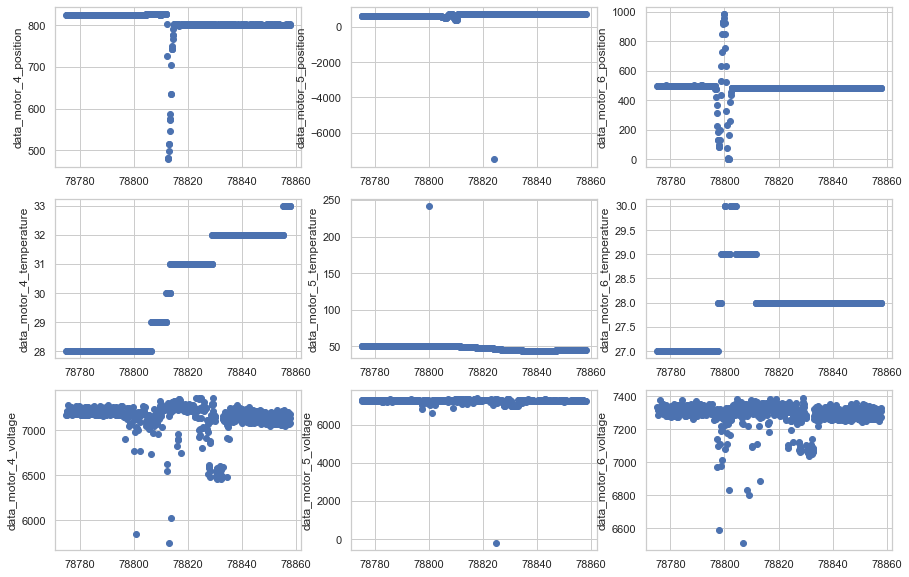

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



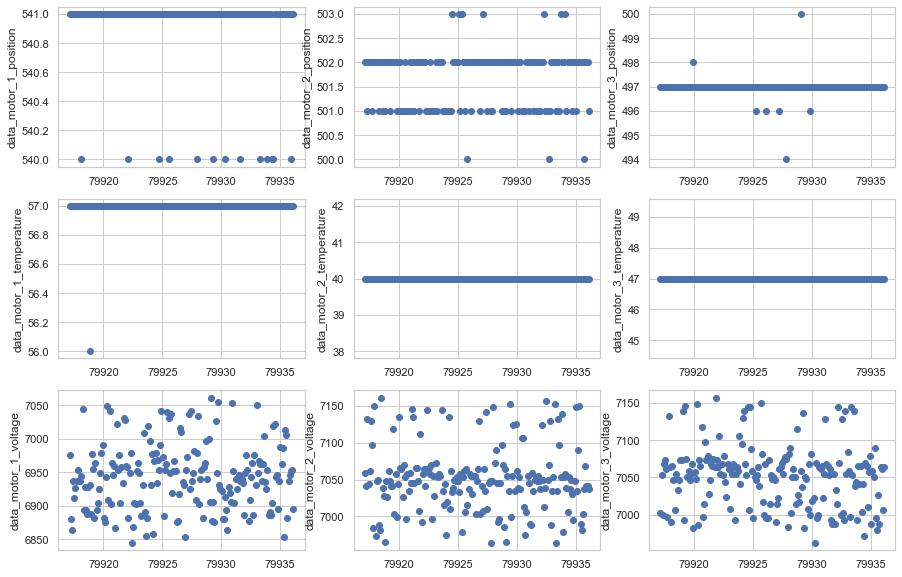

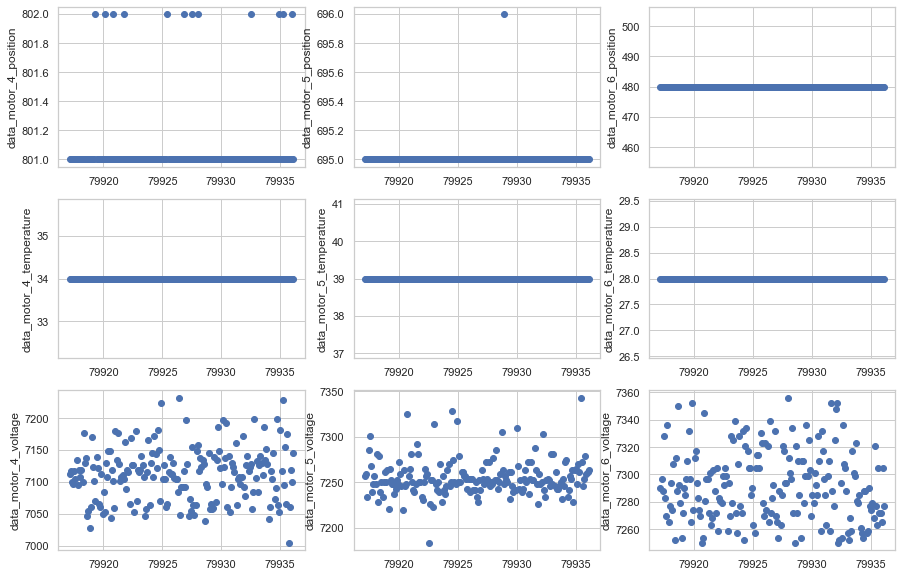

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



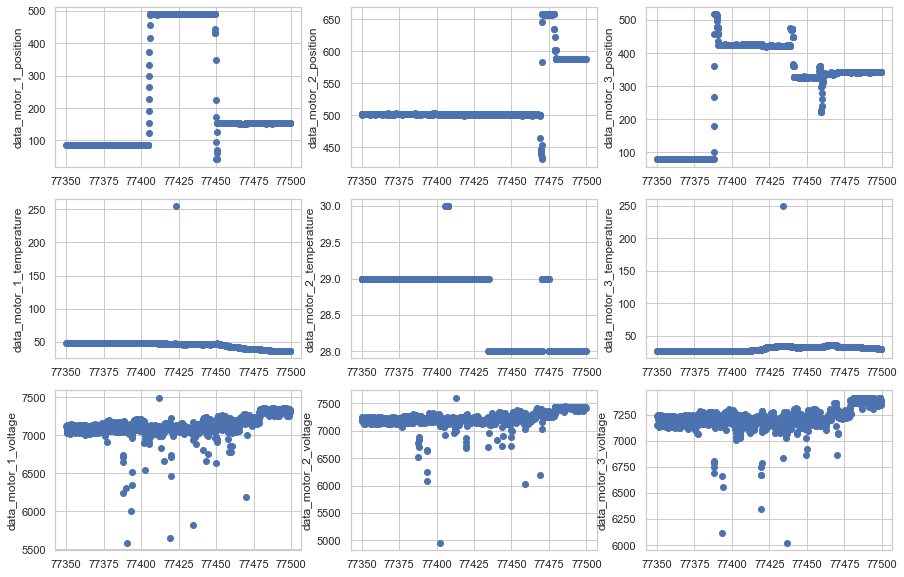

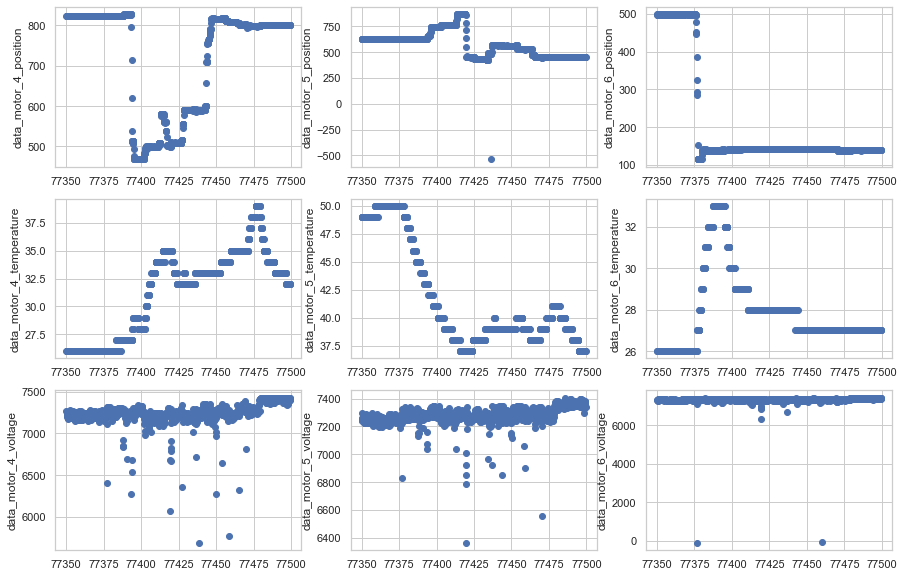

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



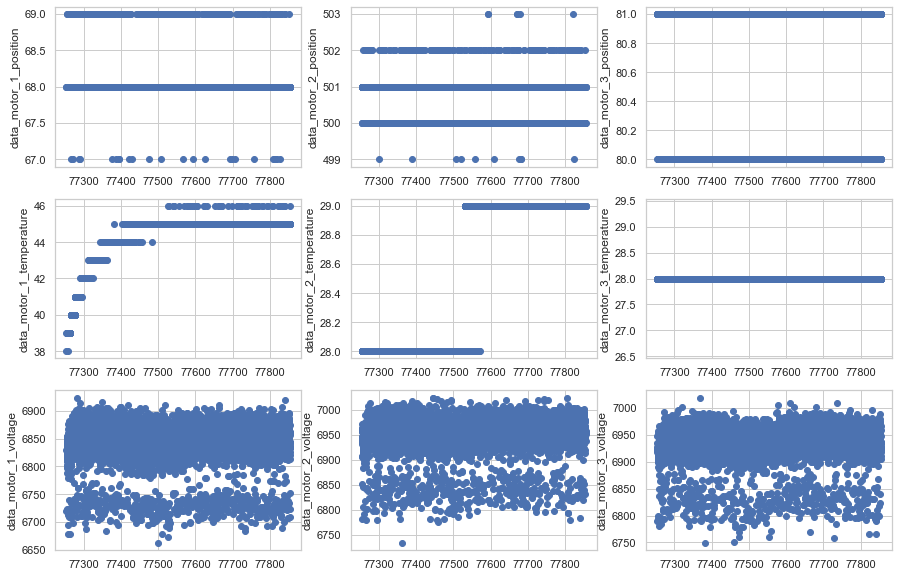

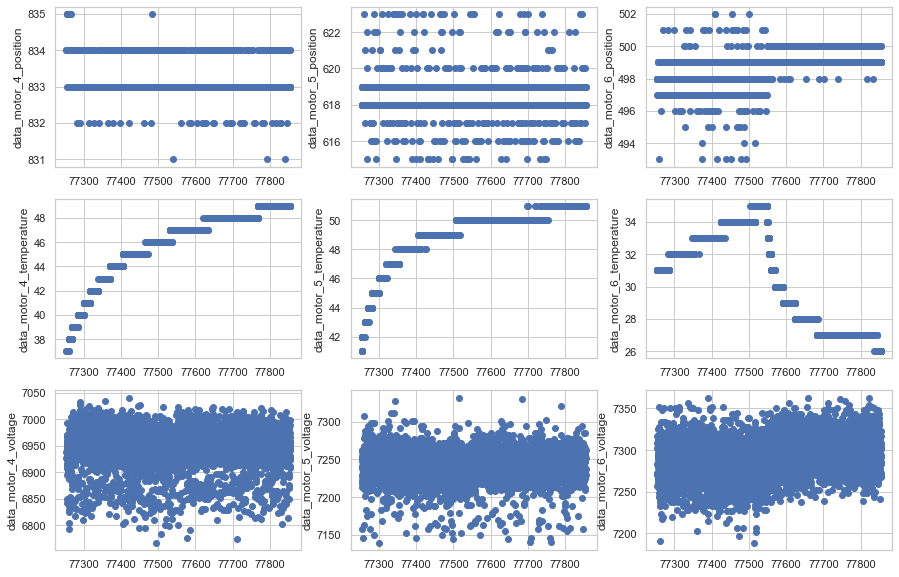

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



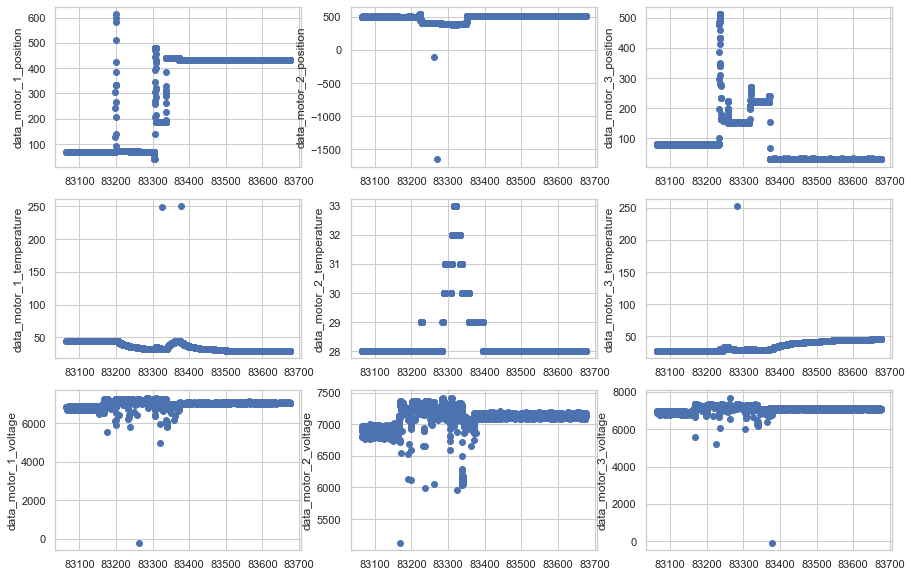

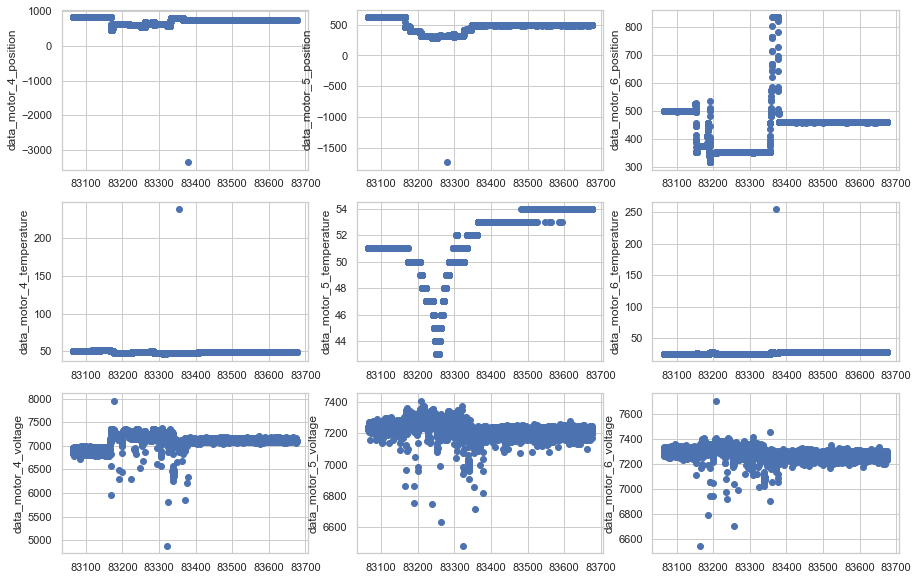

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



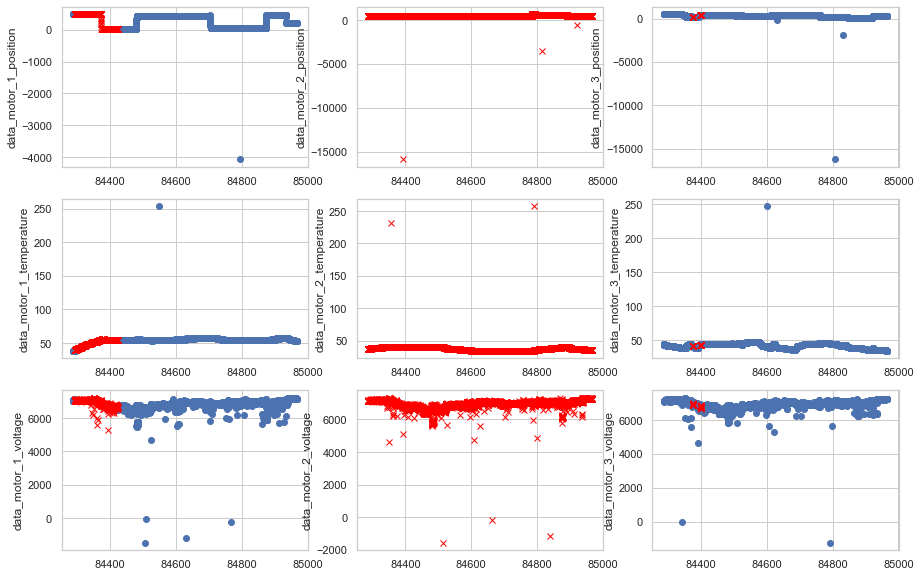

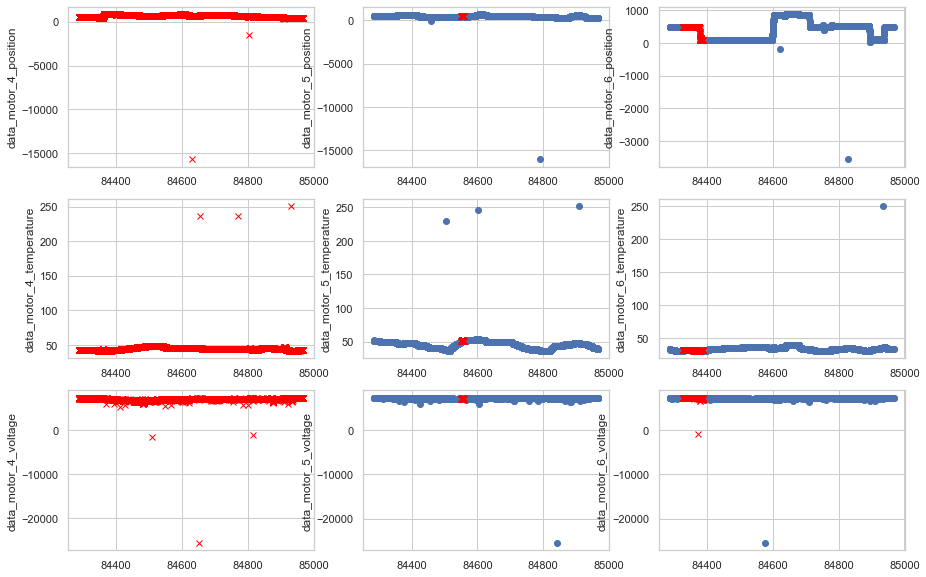

time  data_motor_1_position  data_motor_1_temperature  \
0  76522.025433                     86                        42   
1  76522.125464                     86                        42   
2  76522.225432                     86                        42   
3  76522.325432                     86                        42   
4  76522.425451                     86                        42   

   data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  7223                   0                    501   
1                  7214                   0                    502   
2                  7137                   0                    501   
3                  7135                   0                    501   
4                  7212                   0                    502   

   data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                        31                  7334                   0   
1                        31                  7250                   0   
2                        31                  7234                   0   
3                        31                  7250                   0   
4                        31                  7232                   0   

   data_motor_3_position  ...  data_motor_6_label  data_motor_4_position  \
0                     80  ...                   0                    825   
1                     80  ...                   0                    825   
2                     79  ...                   0                    825   
3                     79  ...                   0                    825   
4                     79  ...                   0                    824   

   data_motor_4_temperature  data_motor_4_voltage  data_motor_4_label  \
0                        25                  7270                   0   
1                        25                  7345                   0   
2                        25                  7277                   0   
3                        25                  7263                   0   
4                        25                  7303                   0   

   data_motor_5_position  data_motor_5_temperature  data_motor_5_voltage  \
0                    619                        43                  7312   
1                    619                        43                  7332   
2                    619                        43                  7330   
3                    619                        43                  7319   
4                    619                        43                  7348   

   data_motor_5_label   test_condition  
0                   0  20240105_164214  
1                   0  20240105_164214  
2                   0  20240105_164214  
3                   0  20240105_164214  
4                   0  20240105_164214  

[5 rows x 26 columns]

In [97]:
# Your code here.
from utility import read_all_test_data_from_path
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'

# Read the data.
df_data = read_all_test_data_from_path(base_dictionary)
df_data.head()

For the structure of the dataframe we have the following meaning of each column: (on "X" we have ther number of the corresponding motor)

•⁠  ⁠data_motor_X_position : This contains the data of the position of the motor in the time period, where its possible to analyse wether the motor is stopped or not and how is it moving. 

•⁠  ⁠data_motor_X_temperature : This contains the data of the motor's temperature in the time period, in which it's possible to analyse the temaperature behaviour of the motor

•⁠  ⁠data_motor_X_voltage: This contains the data of the motor's voltage used in the time period. 

•⁠  ⁠data_motor_X_label: This contains the binary data that represent if the motor is failing in the time period - when it's failing is represented by "1", otherwhise is represented by "0"

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

*Do we have a lot of noise in the features? Do we need to smooth the data?*

To assess if there's noise in the features we should look for sudden fluctuations that do not seem to follow a clear pattern. Some data points disrupt the expected behavior, introducing noise. These disruptions, often outliers, can distort analysis and make it difficult to understand cleary what is happening. To address this, we apply data smoothing techniques like moving averages or low-pass filters. Smoothing helps reveal underlying patterns while reducing the impact of outliers, enhancing the accuracy of our analysis.

*Do we need to scale the features?*

Scaling features is important when the features have different ranges or units. Different features might have different ranges. They need to be transformed into the same scale.	
For example, if temperature is measured in Celsius and position in millimeters, they may have vastly different scales. Scaling ensures that each feature contributes proportionately to the analysis. Techniques like Normalization or Standardization can be applied to bring features to a similar scale.

*Do we have a lot of outliers? Do we need to remove them?*

Outliers are data points that significantly deviate from the rest of the normal samples. We can see in the graphs that there are a significant number of outliers which distrub the normal beahvior and thus create noise in the features.
These points represent anomalies or errors in measurement. If they are anomalies, it is essential to understand their impact on the analysis as sometimes outliers carry valuable information about the system's behavior maybe indicating a failure or something different from the normal situation is going on. However,some other outliers may be due to measurement errors or other external factors,so in these cases removing or imputing them is the appropriate thing to do. 

*Do we have a lot of missing values? Do we need to fill them?*

After examining the dataframe, it appears that there are not a significant number of missing values. However, due to the size of the dataset, it is difficult to check it entirely. Nonetheless, if missing values are identified, it would be essential to address them promptly. This can be done by either dropping these missing values or imputing values from the existing dataset. These steps are important to maintain the integrity of the data for further analysis.


*In general, do you discover some patterns regarding how temperature of the motor changes?*

When analyzing the temperature graphs, several patterns emerge. For example, during periods of heavy workload or operation, the temperature of the motors tends to increase. Conversely, during resting periods, the temperature decreases as the motors cool down. 
Some of the temperature graphs exhibit a sinusoidal-like shape, indicating cyclical changes in temperature over time. Still there is not a clear pattern observable across all motors, we can infer that temperature fluctuations are influenced by each motor's workload, operating environment, and cooling efficiency. 


*If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?*

When comparing normal data (label = 0) with failures (label = 1), differences in temperature patterns become apparent. Under normal operating conditions, temperatures generally follow a stable pattern, increasing when the motor is active and decreasing during resting periods. However, during failures, temperature patterns may deviate from this norm. This could manifest as prolonged periods of a certain temperature or erratic fluctuations. These deviations from the normal pattern can serve as indicators of potential failures or abnormalities within the system."

## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

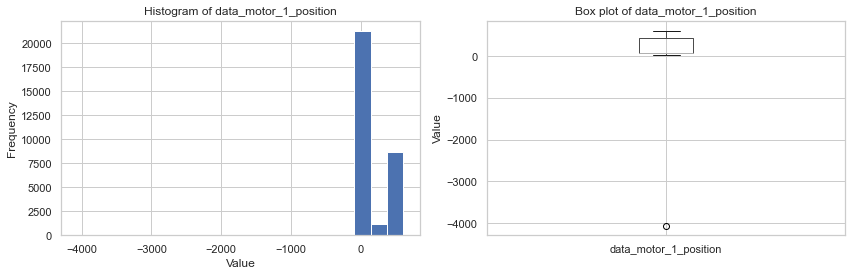

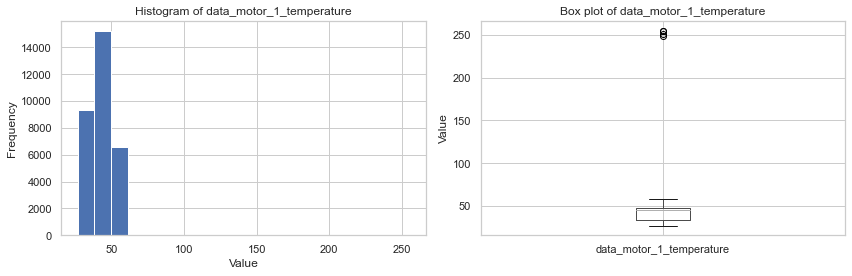

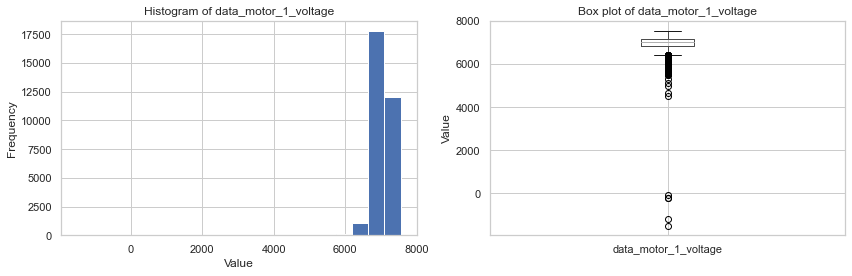

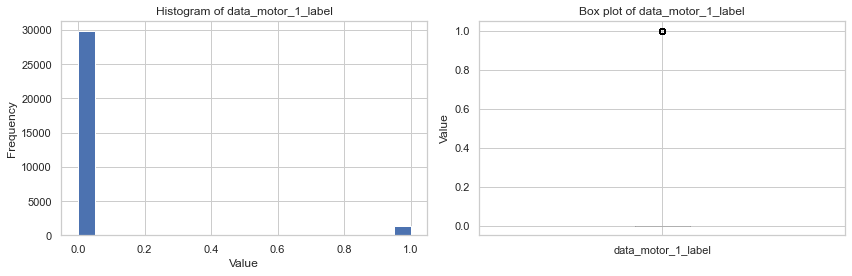

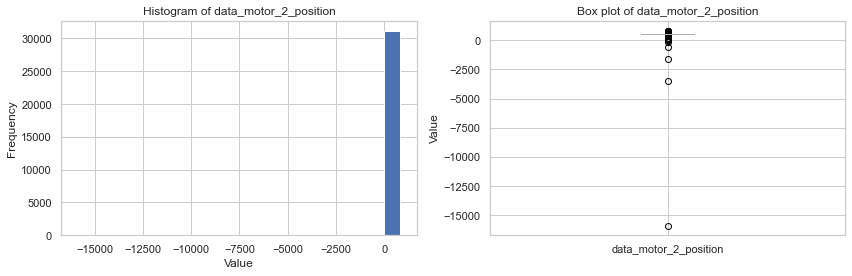

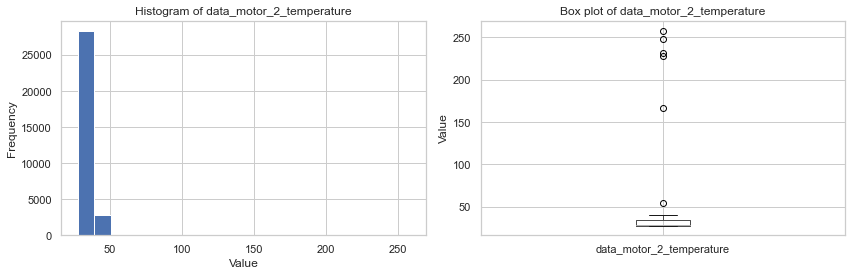

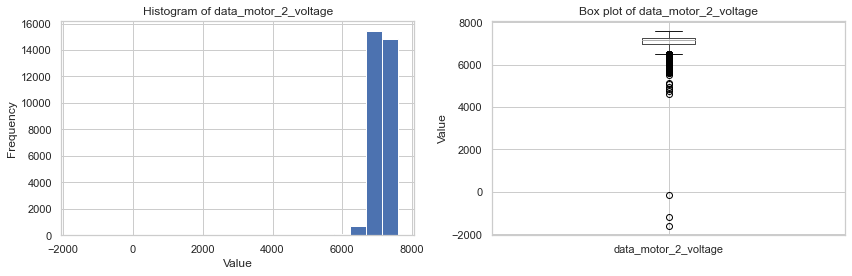

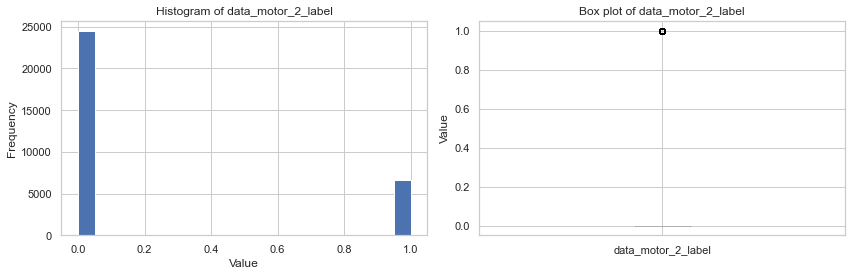

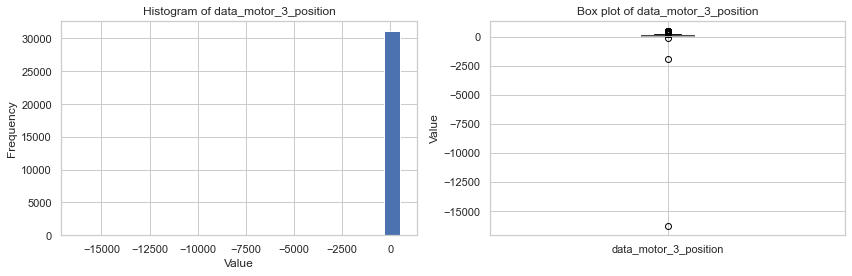

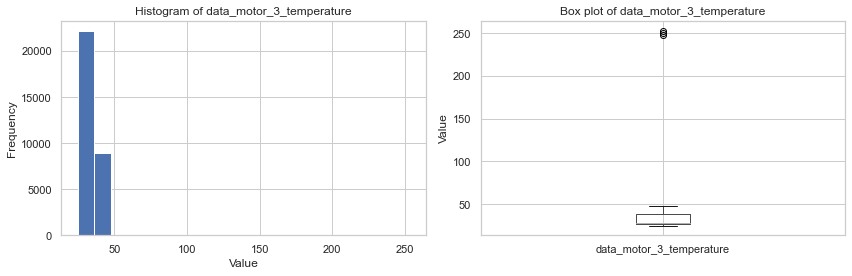

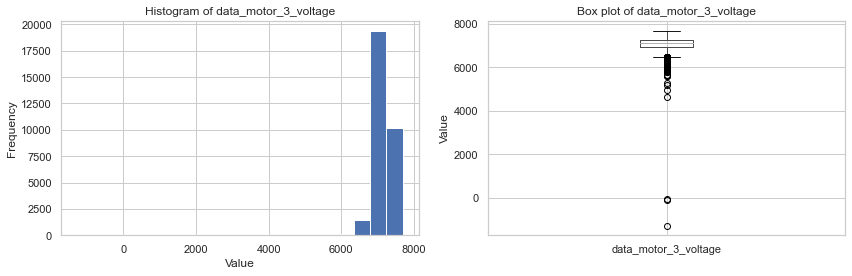

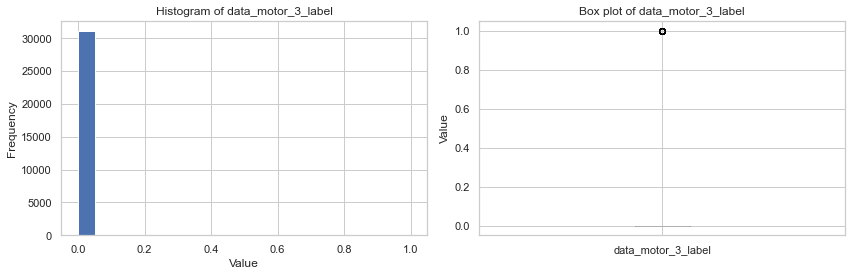

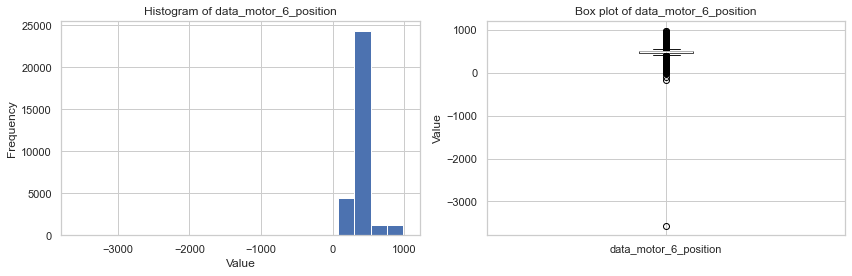

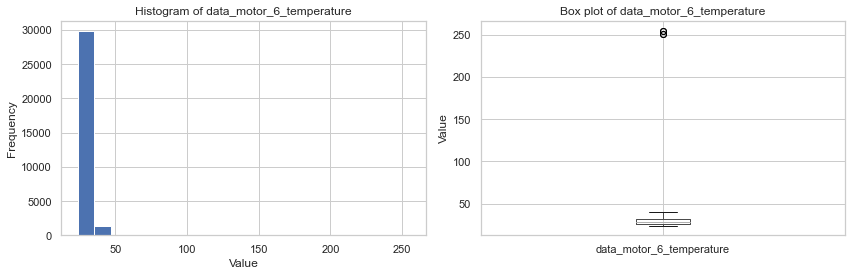

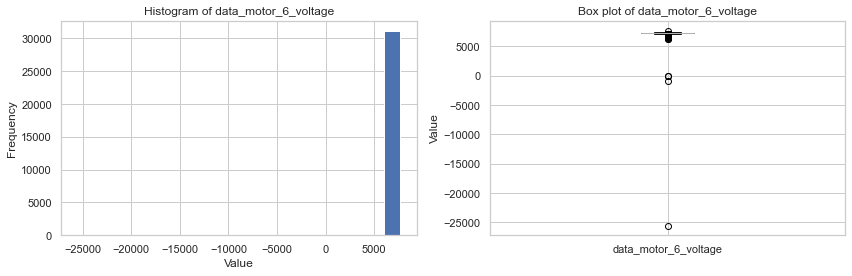

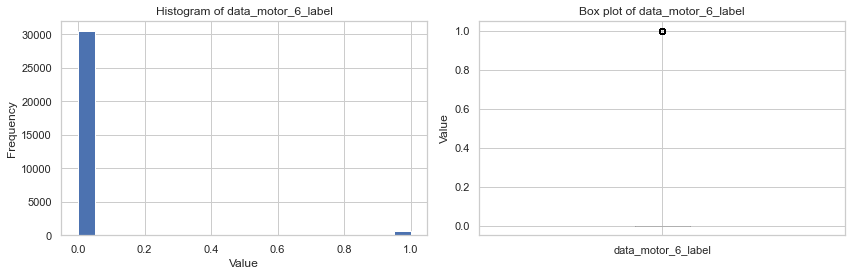

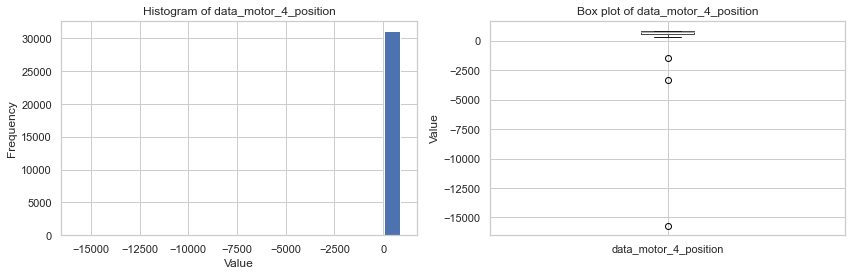

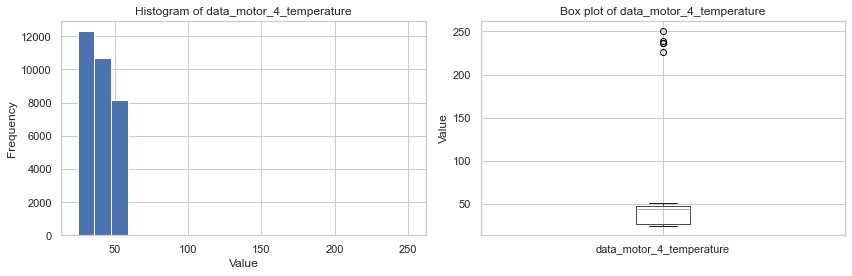

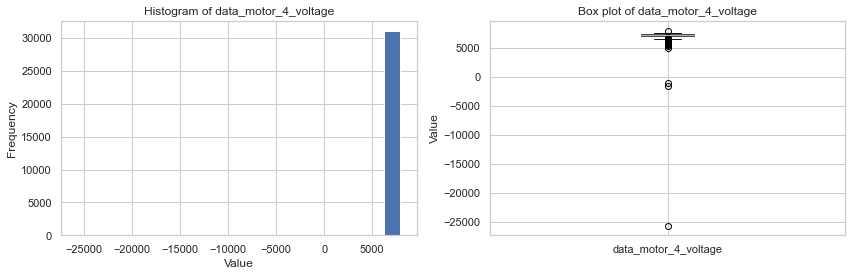

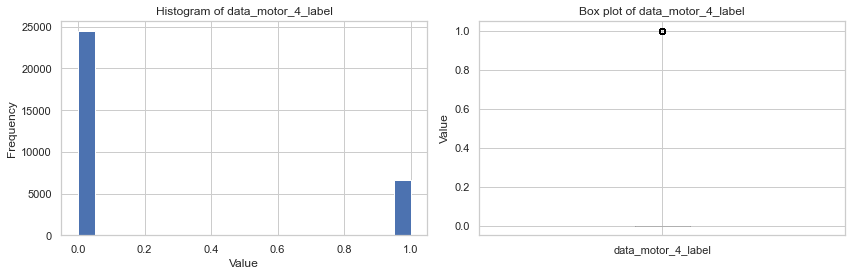

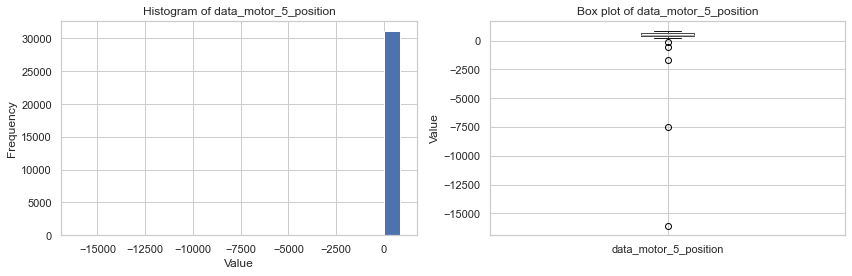

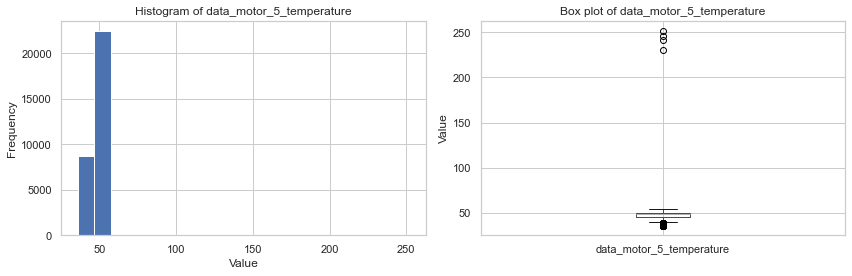

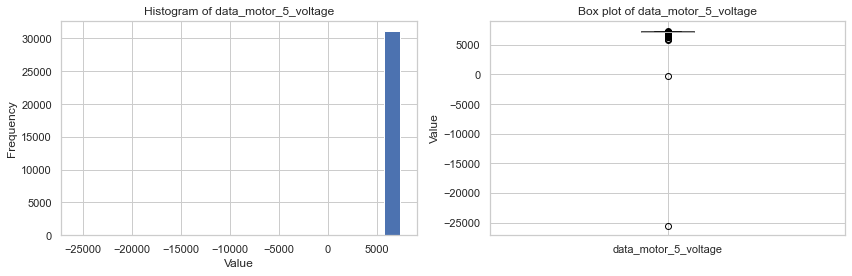

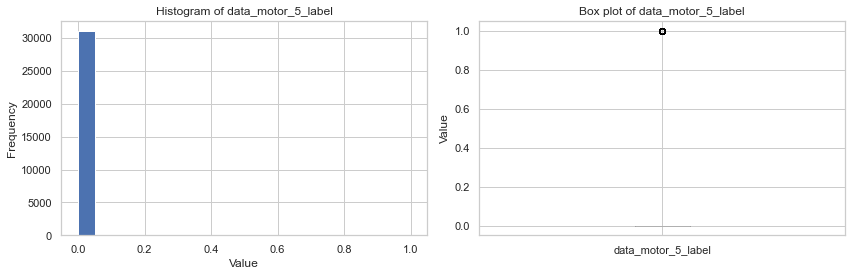

In [98]:
import matplotlib.pyplot as plt

for col in df_data.columns:
    if col.startswith('data_'):
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns
        
        # Histogram
        axes[0].hist(df_data[col], bins=20)
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel('Value')
        axes[0].set_ylabel('Frequency')
        
        # Box plot
        df_data.boxplot(column=[col], ax=axes[1])
        axes[1].set_title(f'Box plot of {col}')
        axes[1].set_ylabel('Value')
        
        plt.tight_layout()  
        plt.show()

## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

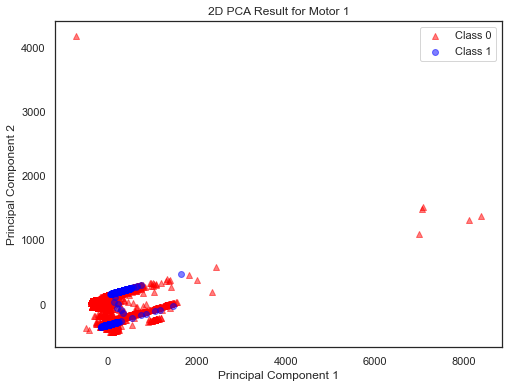

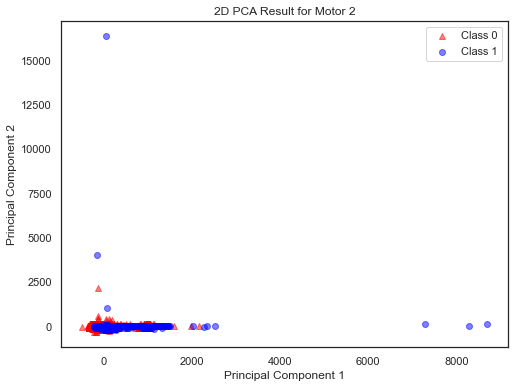

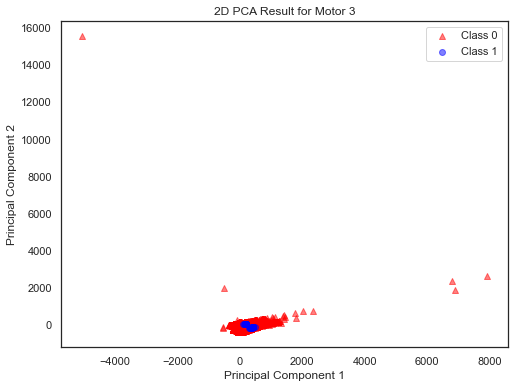

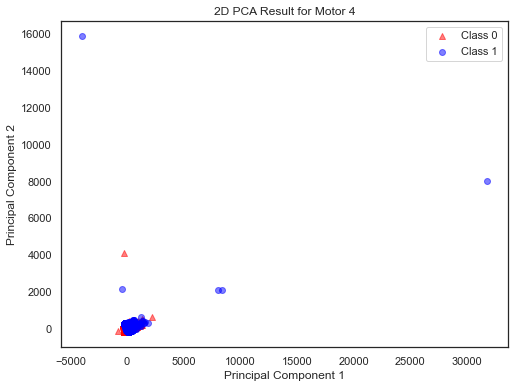

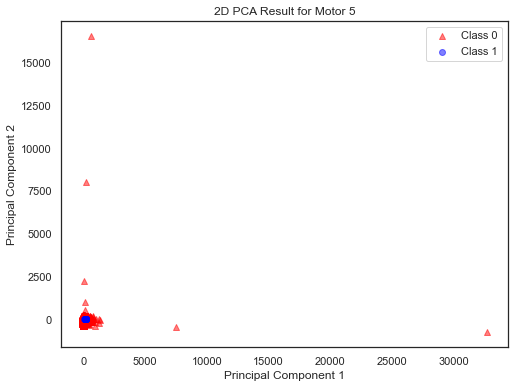

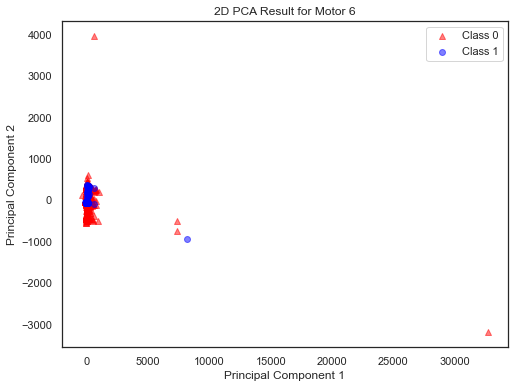

In [118]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define a function to perform PCA and plot the results for a given motor
def plot_pca_for_motor(df_data, motor_number):
    # Generate column names based on the motor number
    position_col = f'data_motor_{motor_number}_position'
    temperature_col = f'data_motor_{motor_number}_temperature'
    voltage_col = f'data_motor_{motor_number}_voltage'
    
    # Extract features (X) and target variable (y) for the specified motor
    X = df_data[[position_col, temperature_col, voltage_col]]
    y = df_data[f'data_motor_{motor_number}_label']
    
    # Perform PCA to reduce the dimensionality to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title(f'2D PCA Result for Motor {motor_number}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Iterate over motors 1 through 6 and plot PCA for each motor
for motor_number in range(1, 7):
    plot_pca_for_motor(df_data, motor_number)


PCA is applied to the features related to each motor (position, temperature, voltage).

The data is projected onto two principal components for visualization purposes.
The resulting scatter plot shows how the data points are distributed in a 2D space, allowing us to observe patterns, clusters, or separability between different classes or groups, such as healthy and faulty motors.
By performing PCA for each motor, we gain insights into the structure and distribution of the data for individual motors, potentially revealing distinct patterns or behaviors specific to each motor's operation.

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

In [100]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
numeric_columns = df_data.select_dtypes(include='number').columns

# We normalize  data and create a new dataframe
normalized_data = scaler.fit_transform(df_data[numeric_columns])
df_normalized = pd.DataFrame(normalized_data, columns=numeric_columns)

print(df_normalized)


           time  data_motor_1_position  data_motor_1_temperature  \
0      0.000000               0.887035                  0.065789   
1      0.000012               0.887035                  0.065789   
2      0.000024               0.887035                  0.065789   
3      0.000036               0.887035                  0.065789   
4      0.000047               0.887035                  0.065789   
...         ...                    ...                       ...   
31130  0.999953               0.910355                  0.114035   
31131  0.999964               0.910355                  0.114035   
31132  0.999976               0.910355                  0.114035   
31133  0.999988               0.910355                  0.114035   
31134  1.000000               0.910355                  0.114035   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  0.963622                 0.0               0.979963   
1                  0.962627        

Numerical features are first identified in the dataframe, and transformation with "fit_transform" is used to normalize the data. It is saved as a new dataframe.

## Task 2: Define a strategy to remove outliers.

Outliers are datapoints very discrepant than the others. They are normally wrong measures. To make sure the data analysis is not going to be affected by their existence our strategy was eliminate them, by selecting standard ranges for each type of data that are expected. To define this ranges we analyzed the boxplot graphs of the data.

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



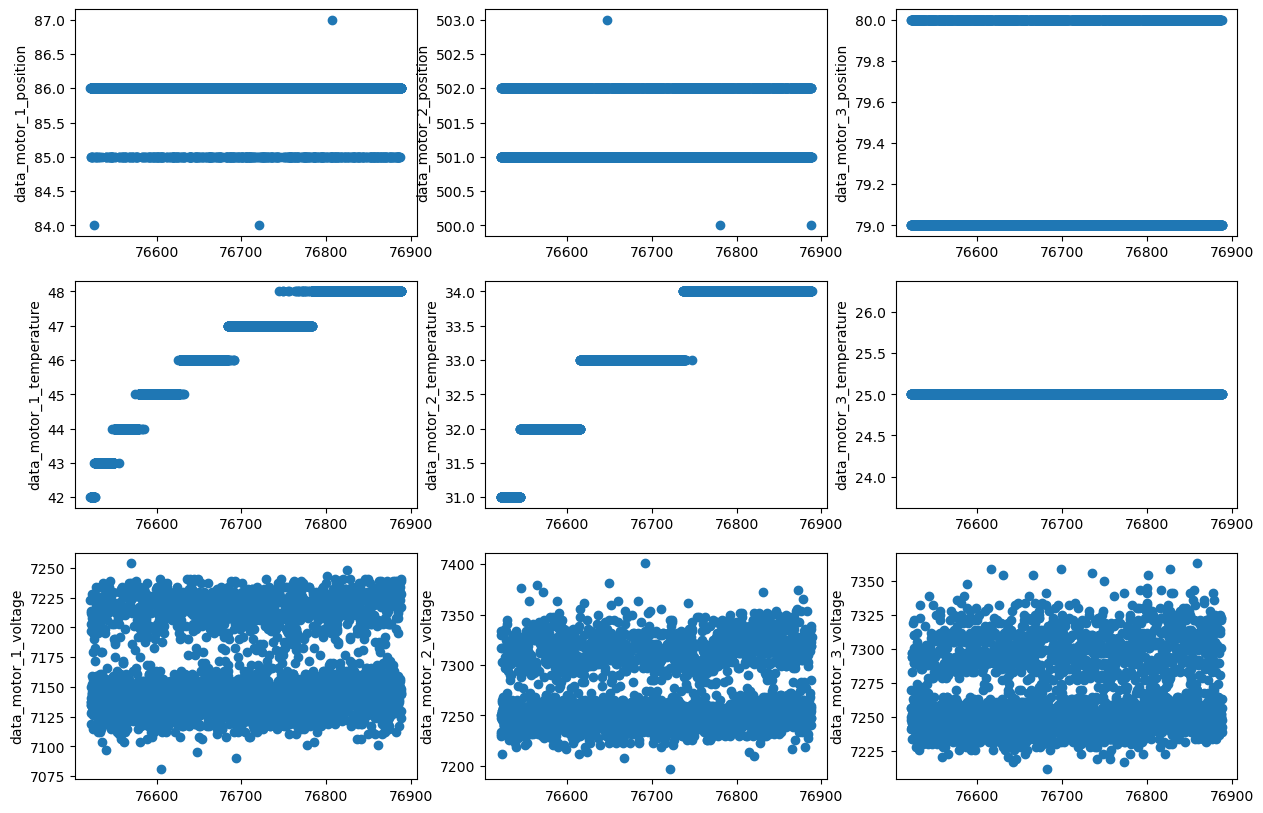

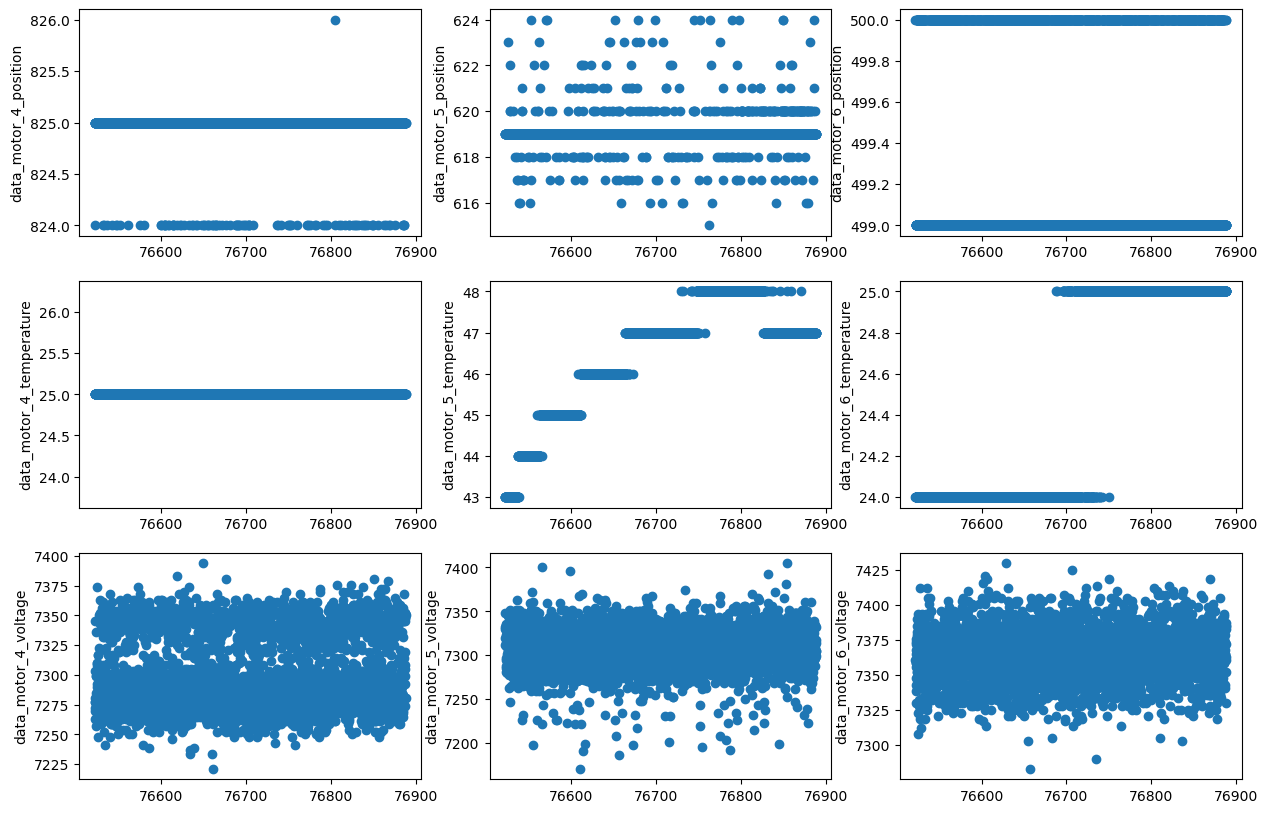

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



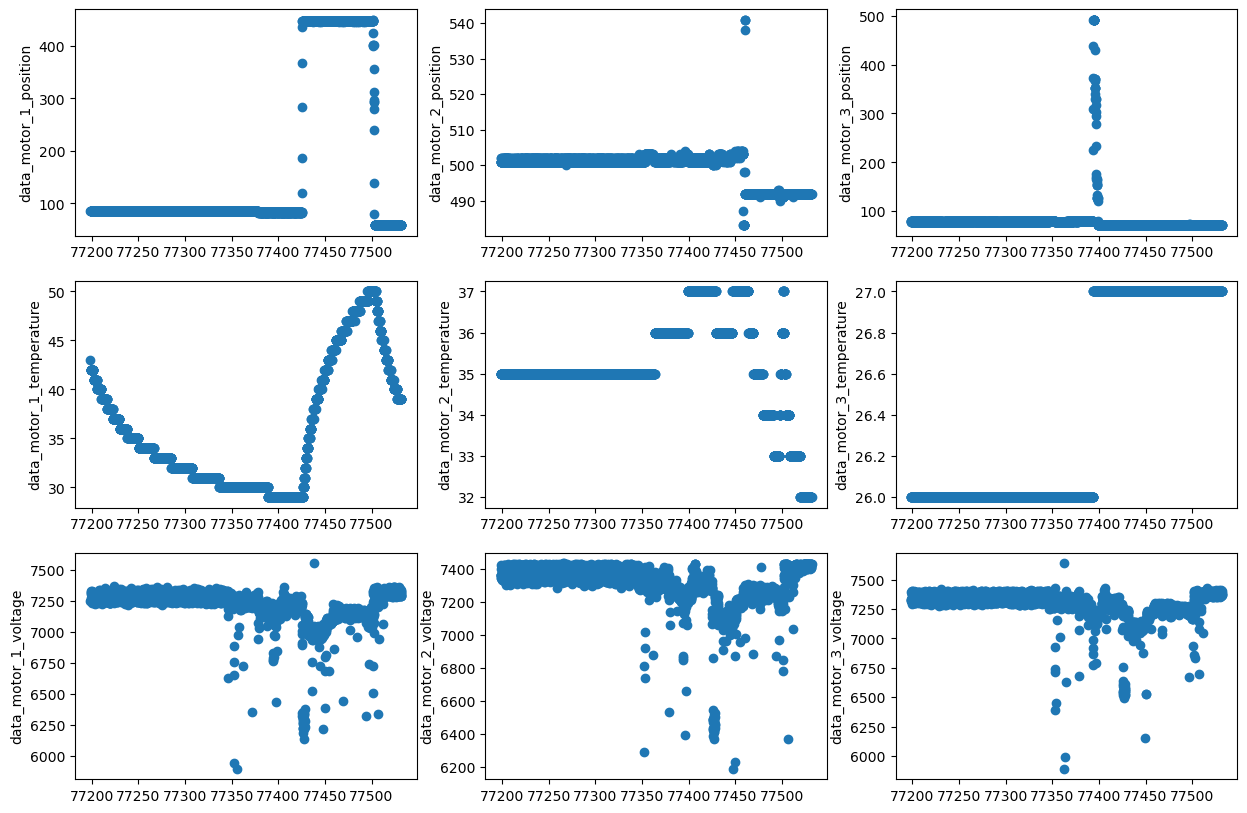

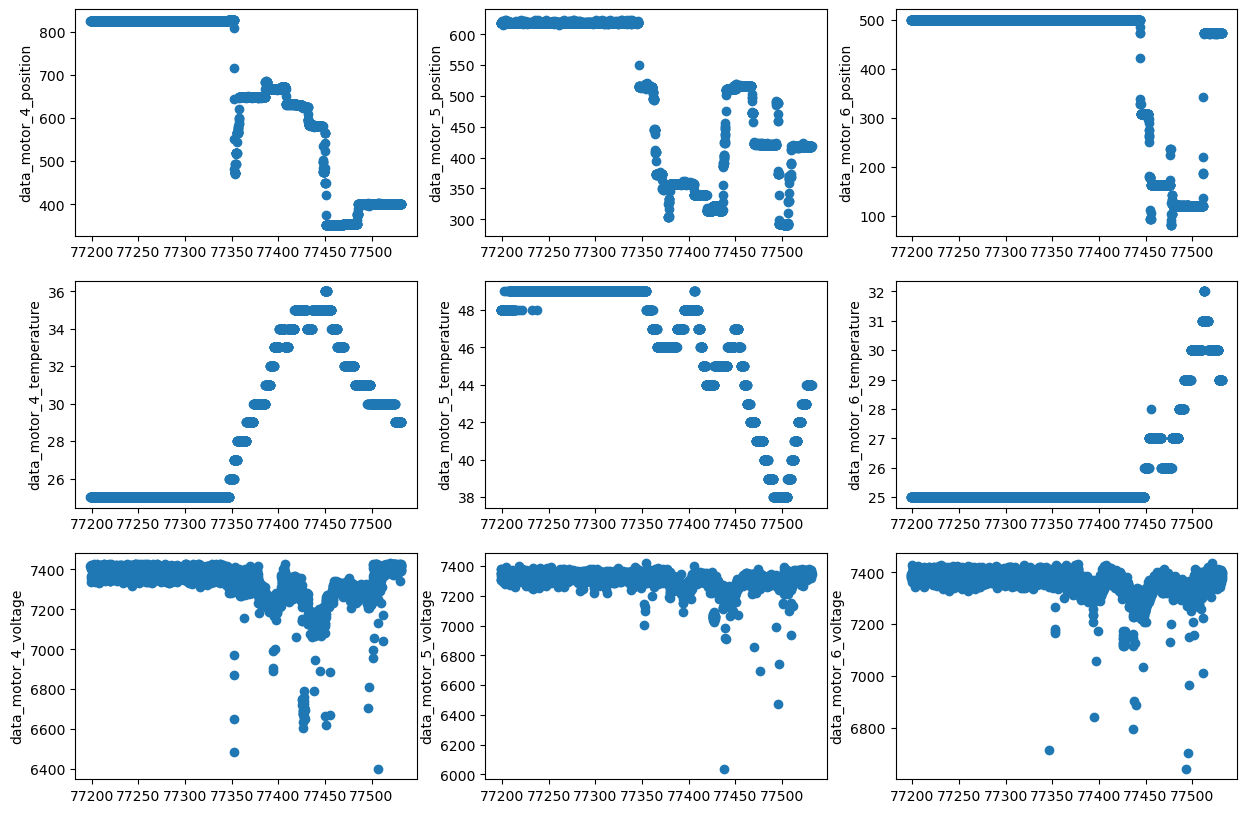

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



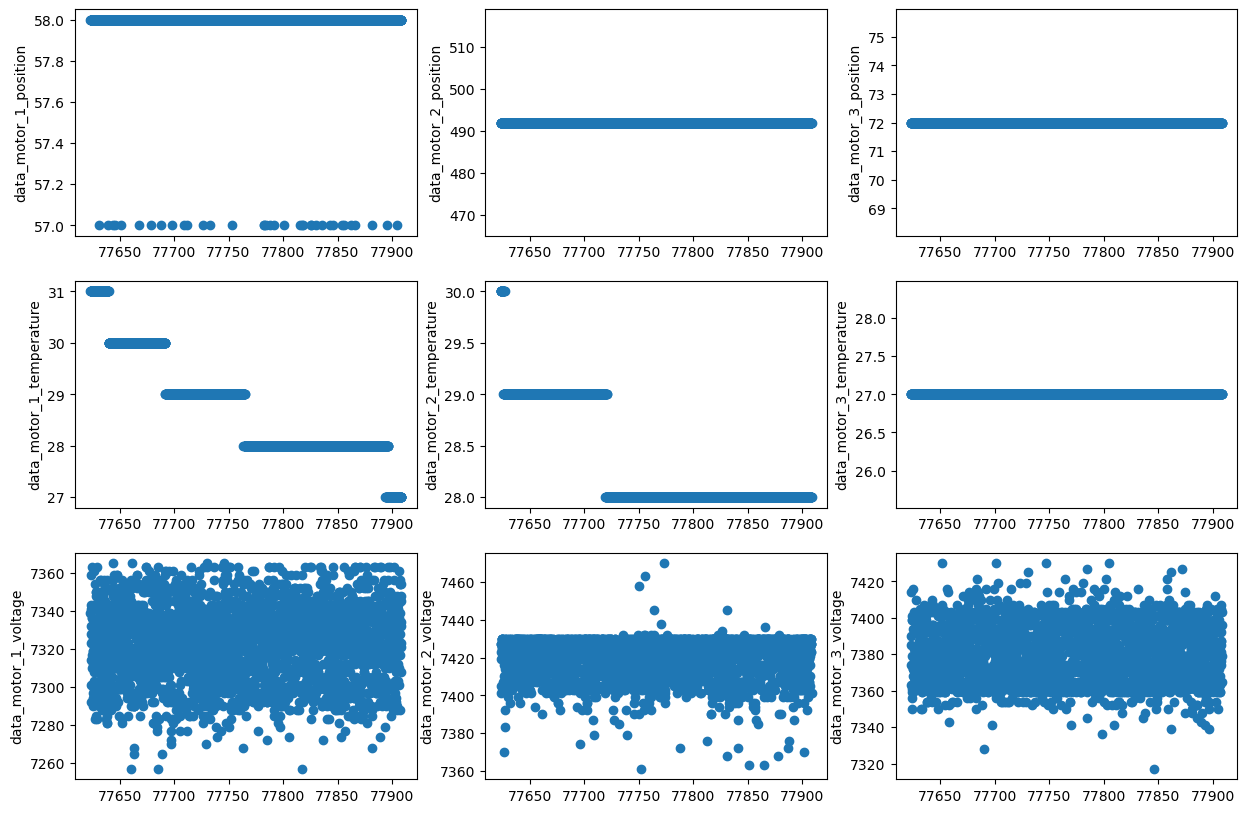

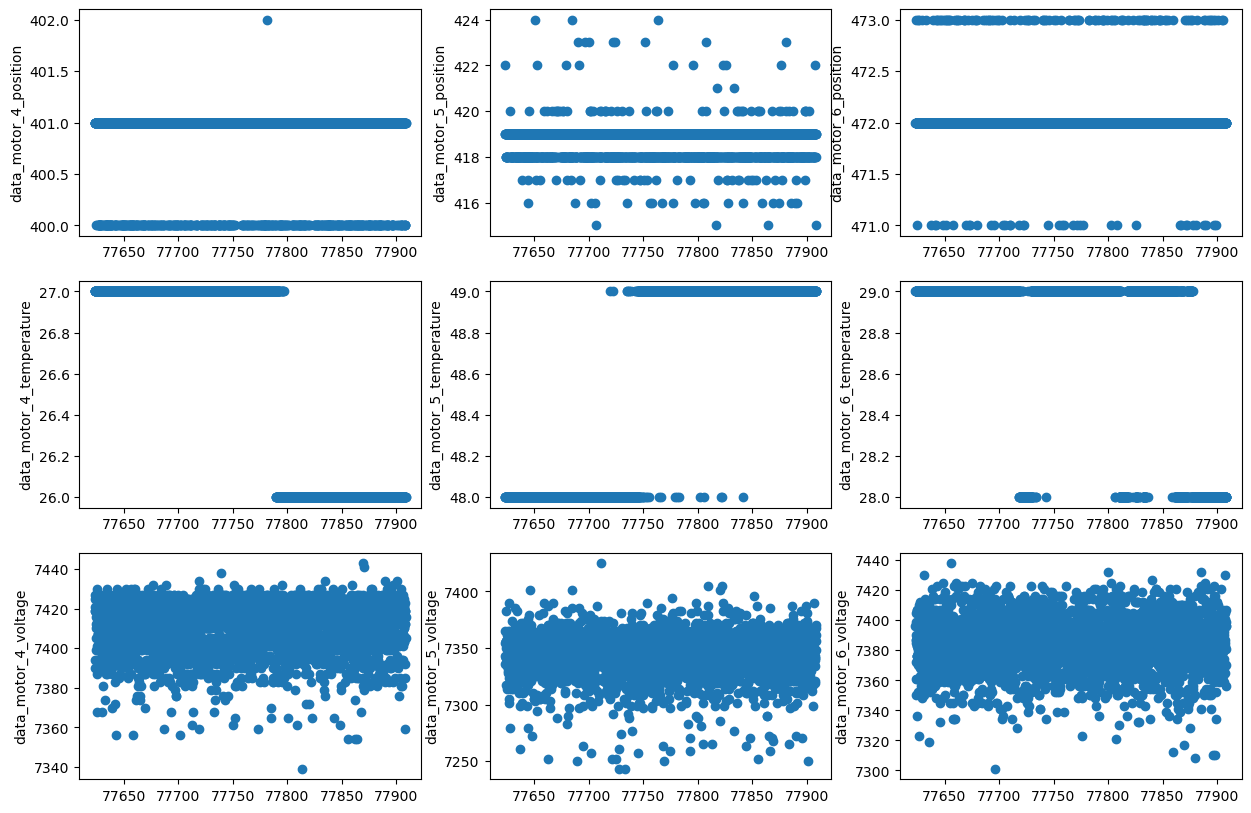

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



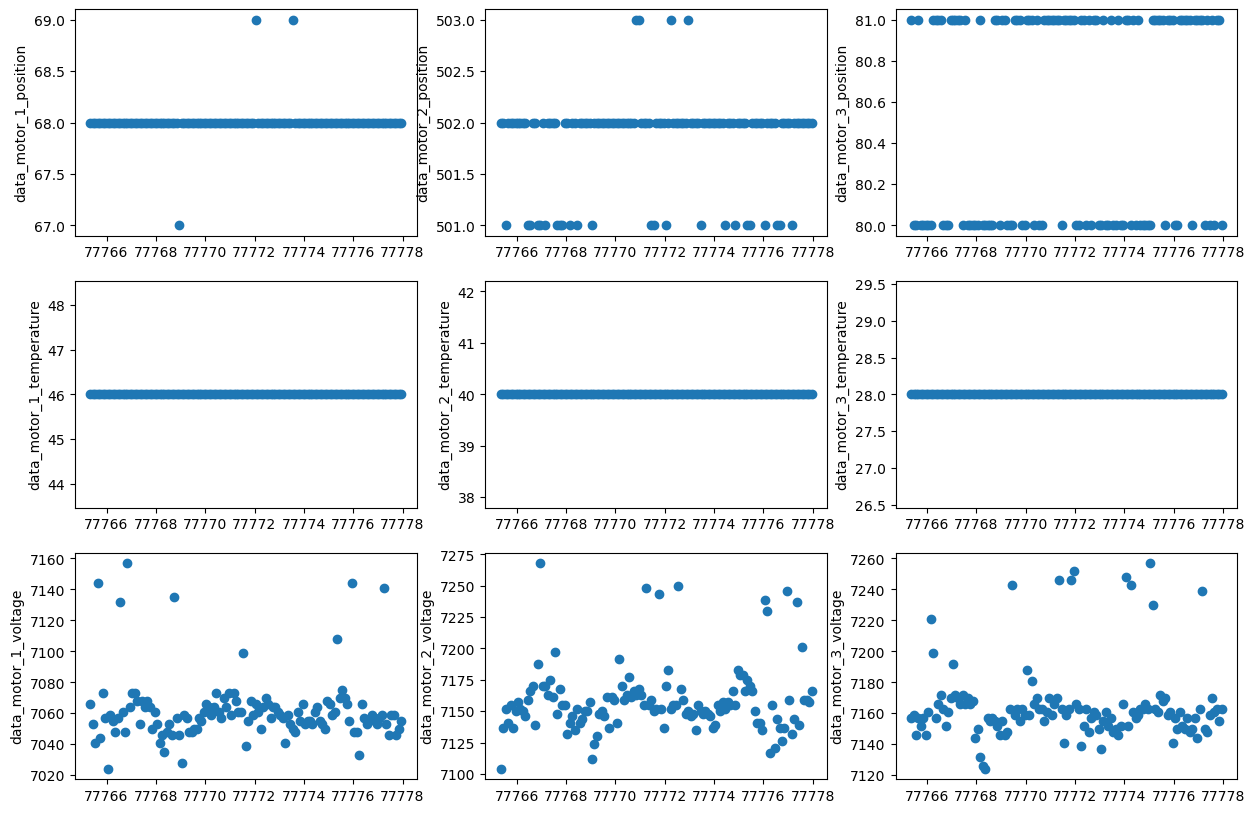

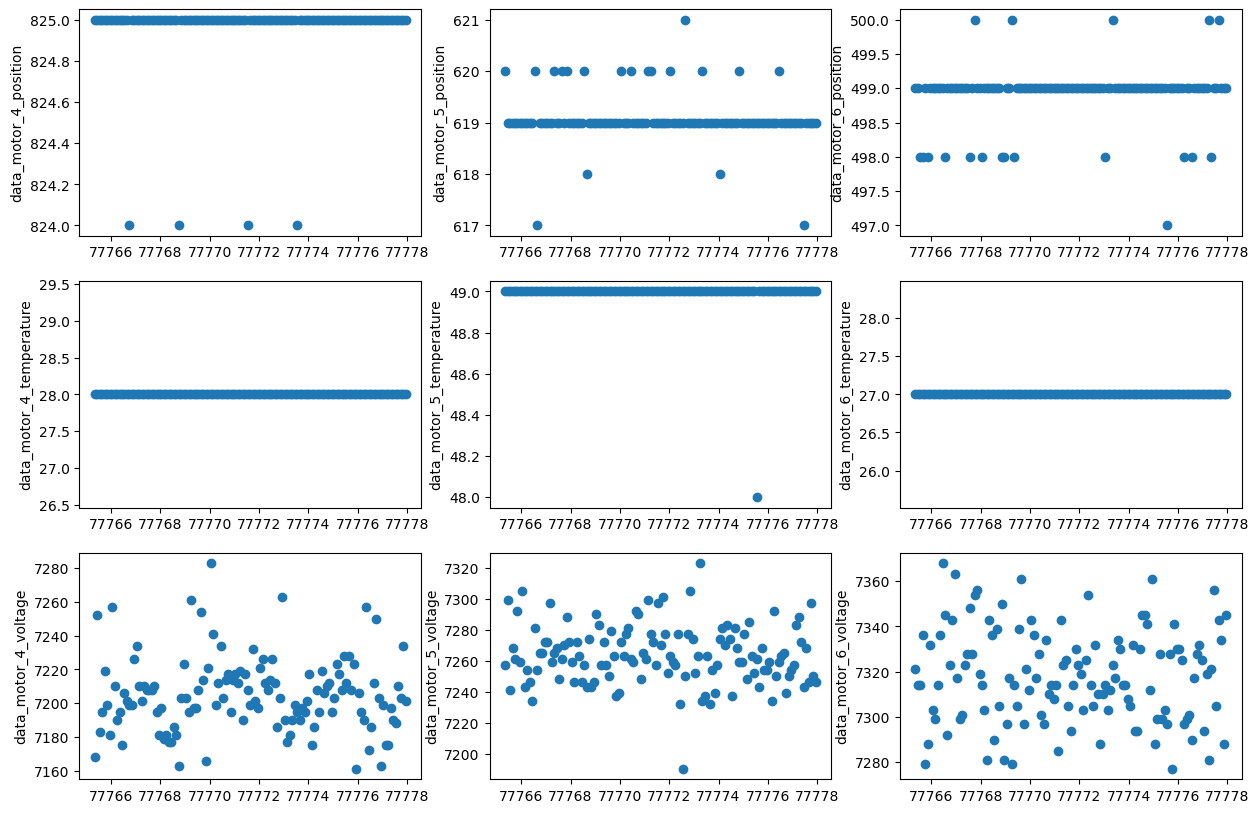

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



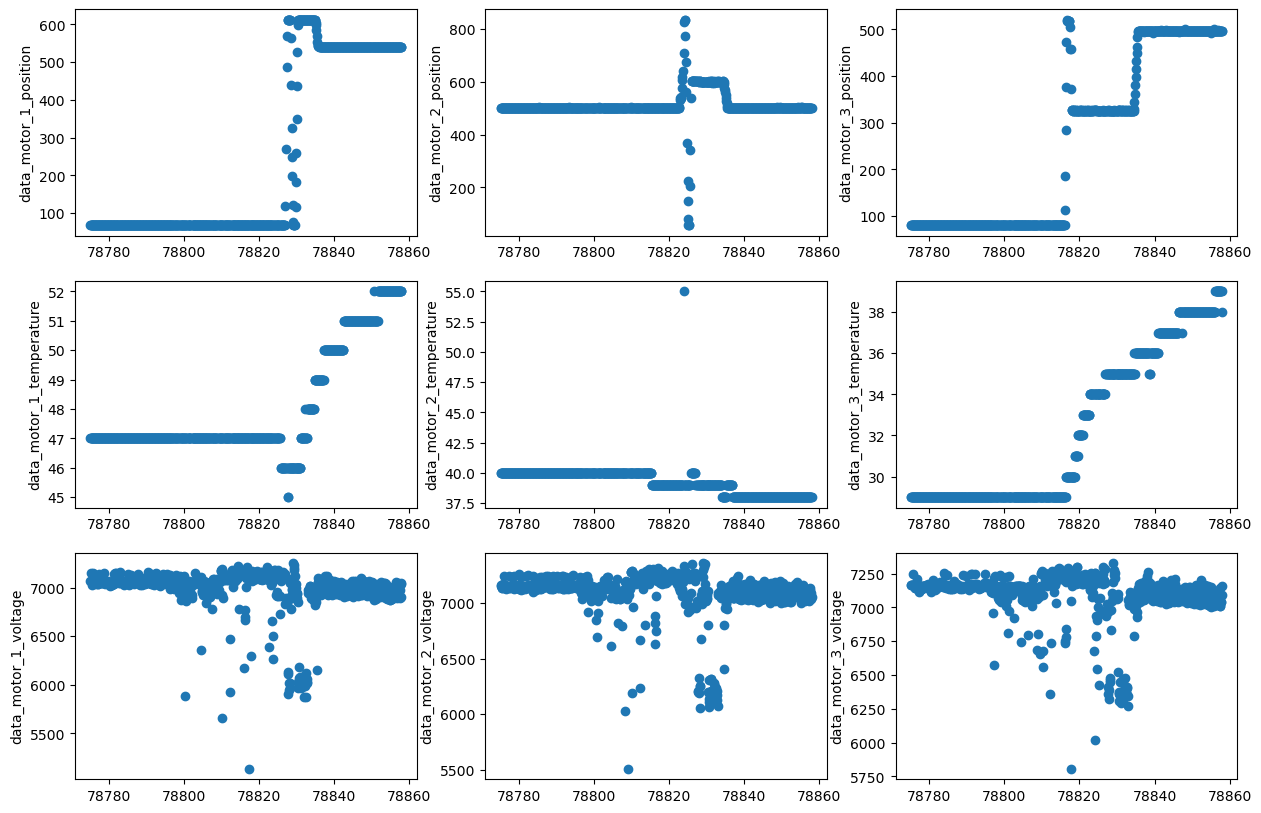

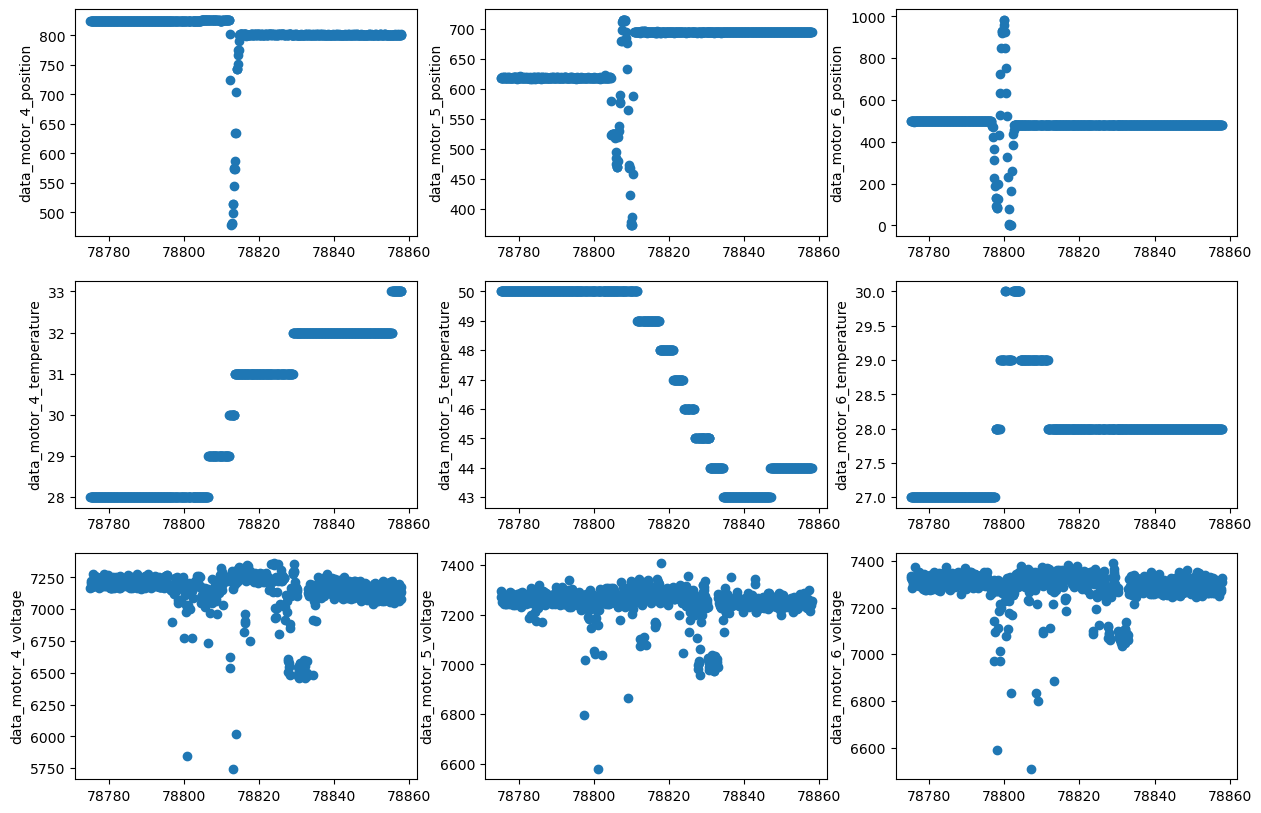

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



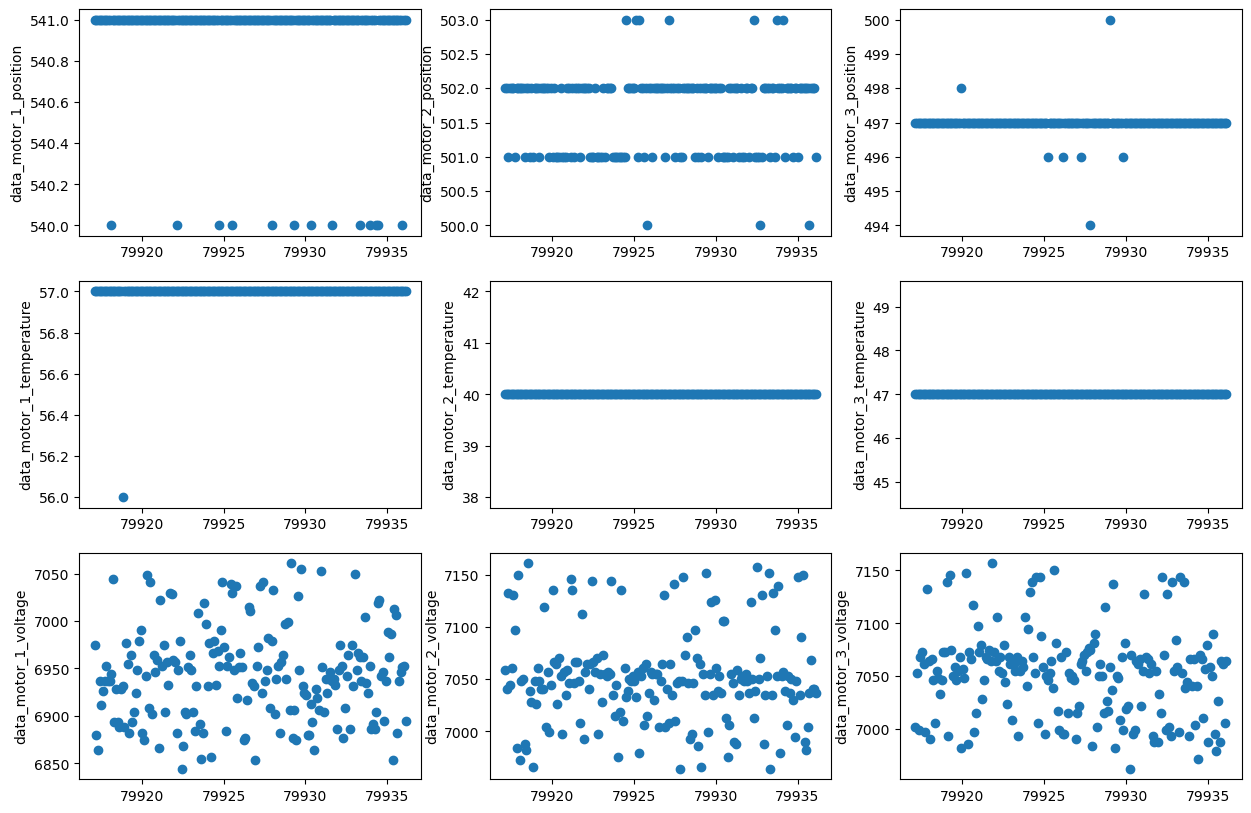

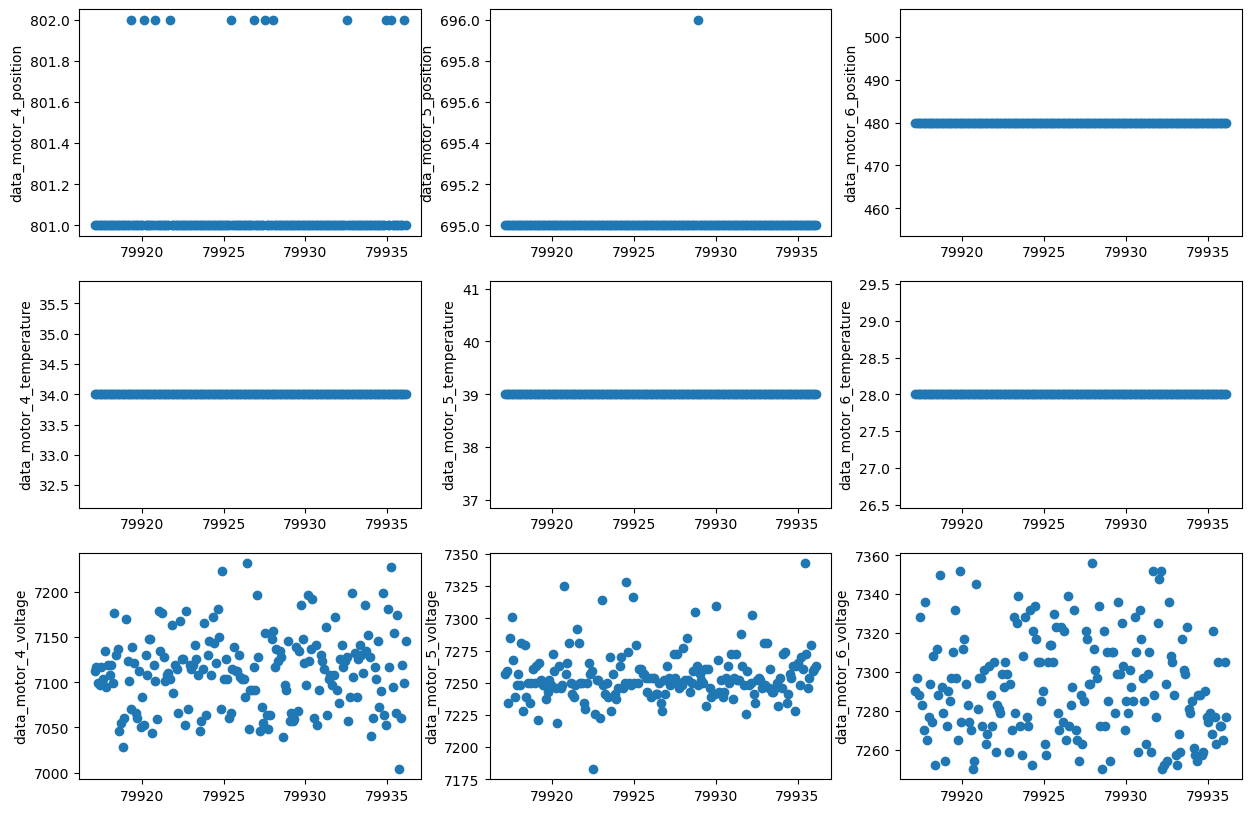

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



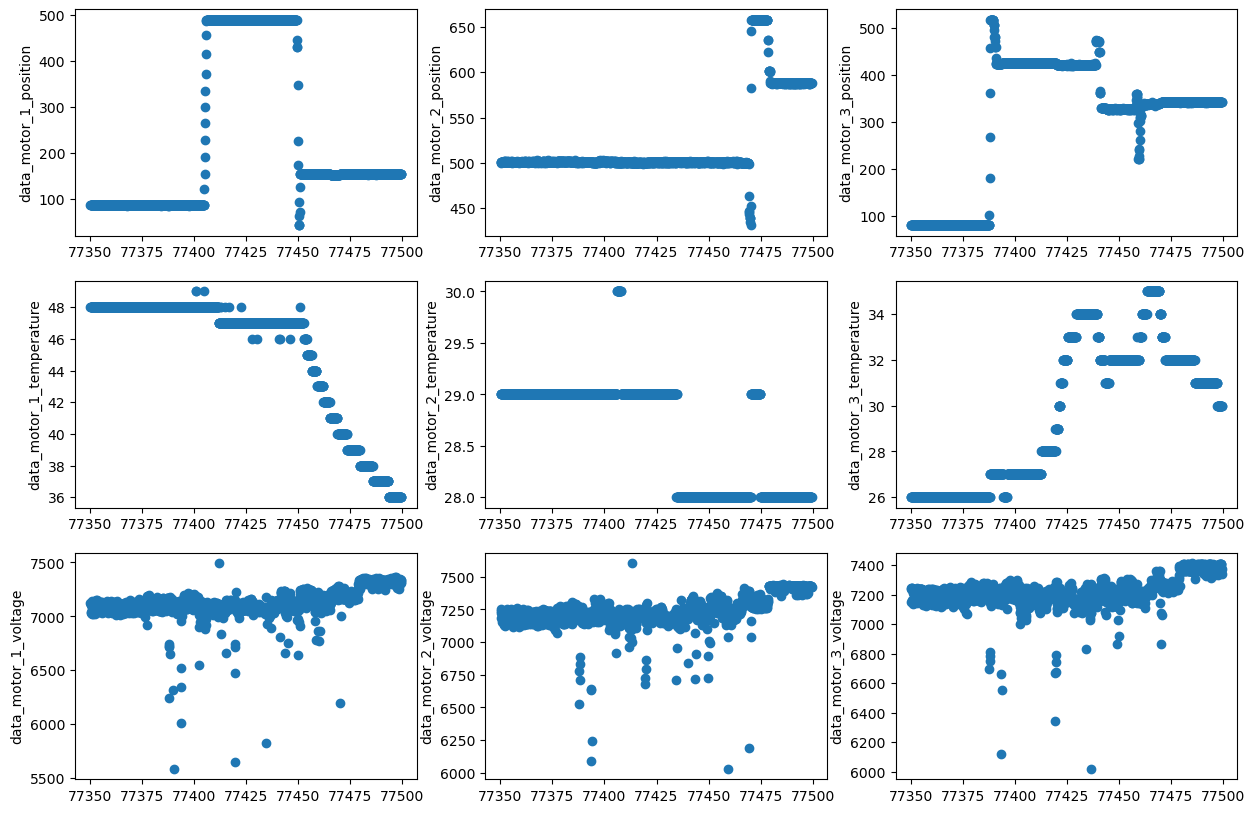

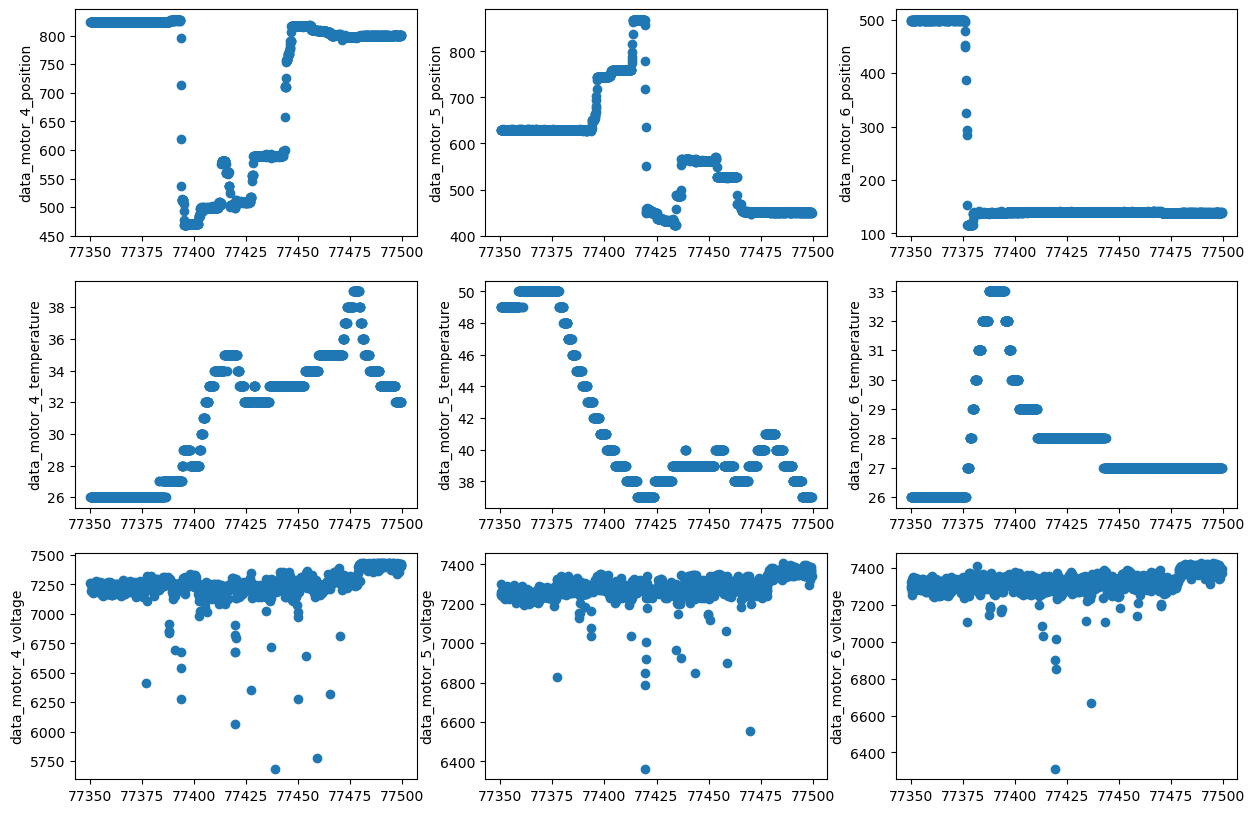

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



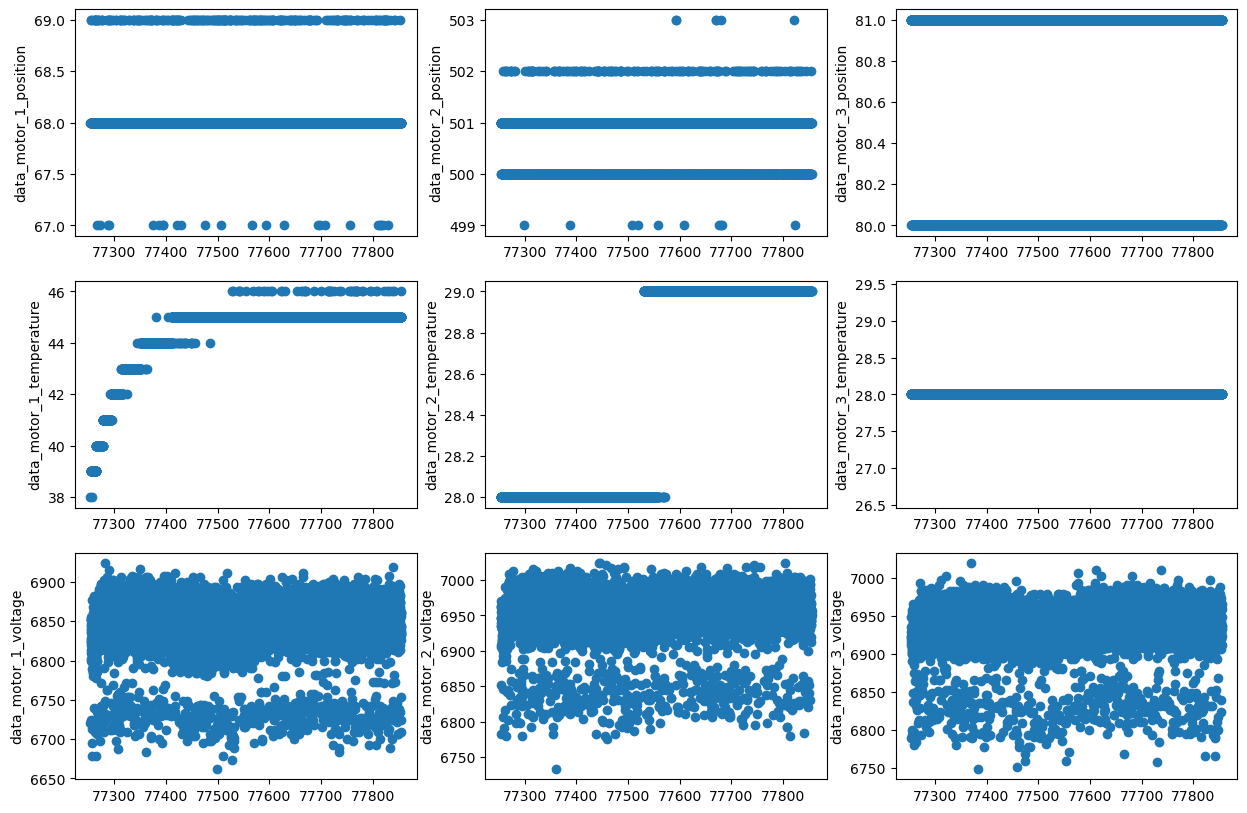

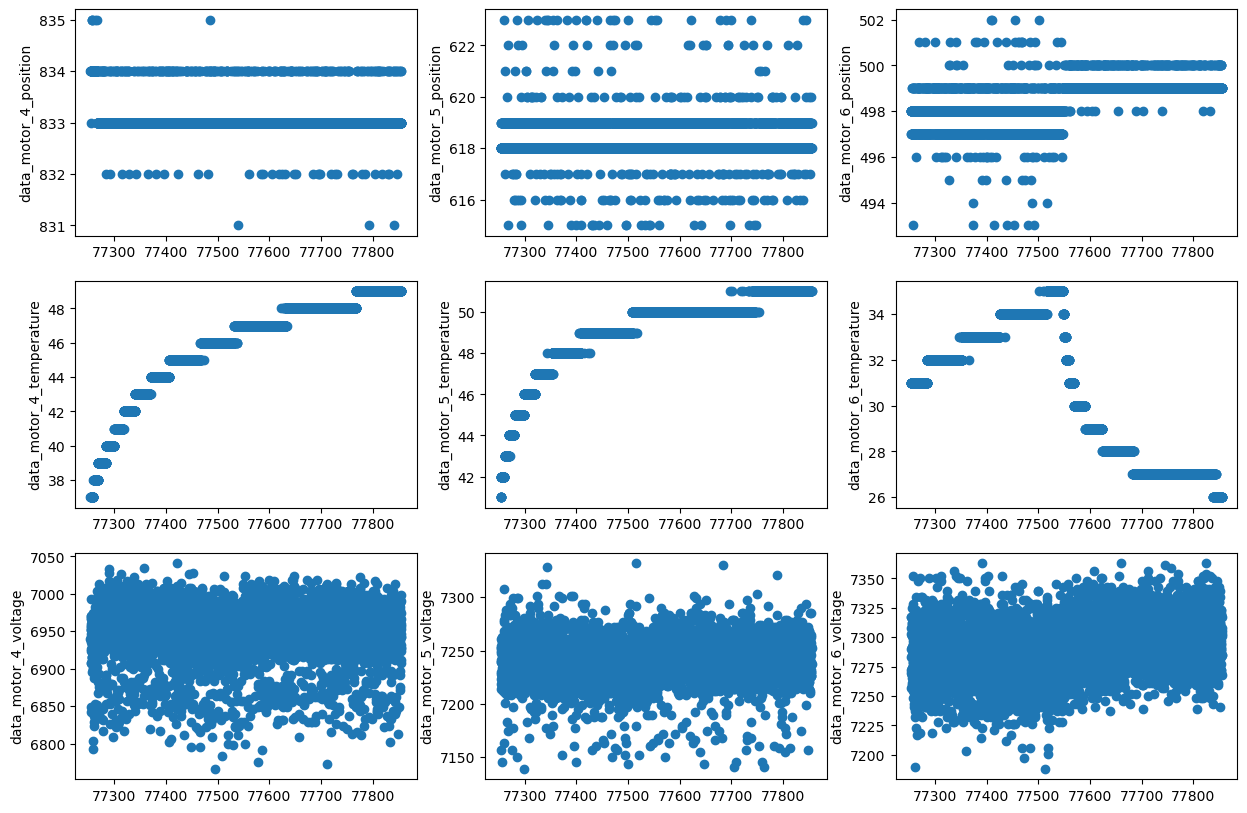

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



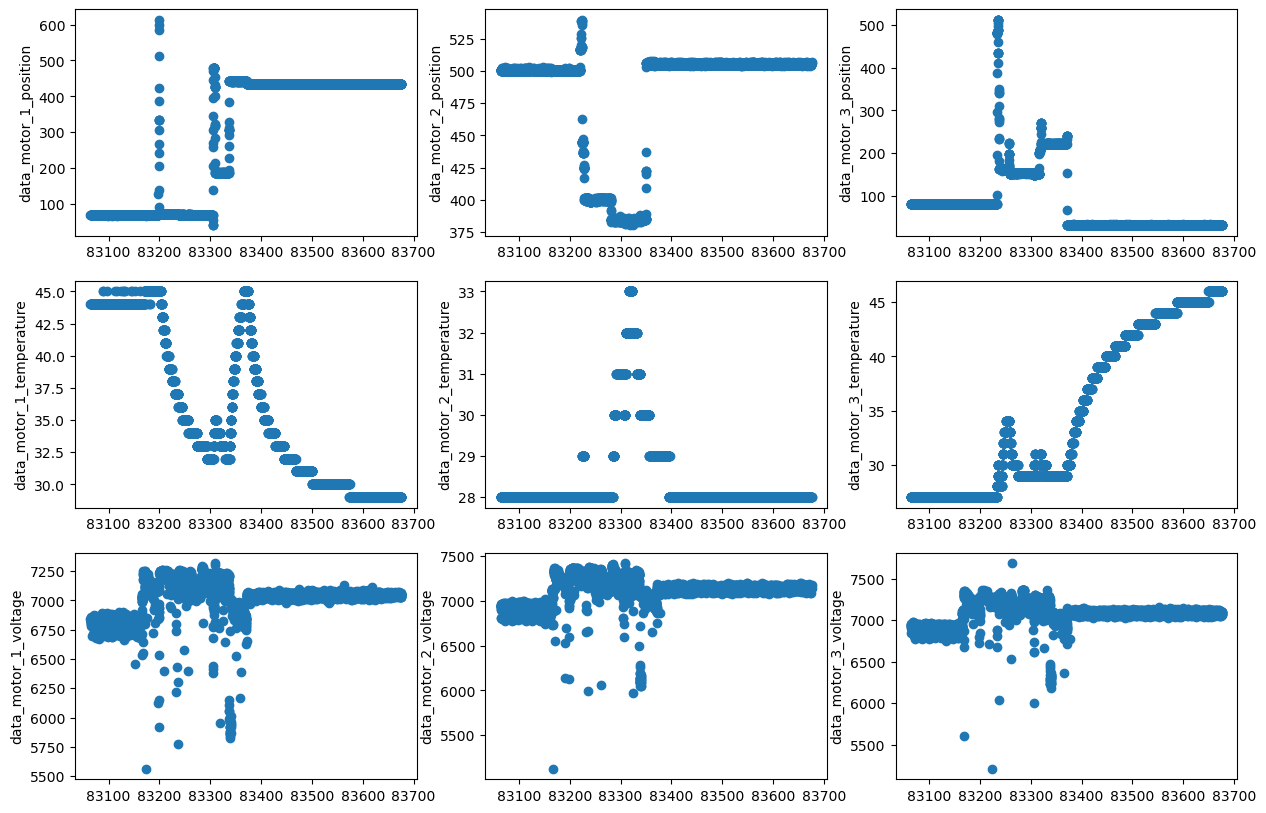

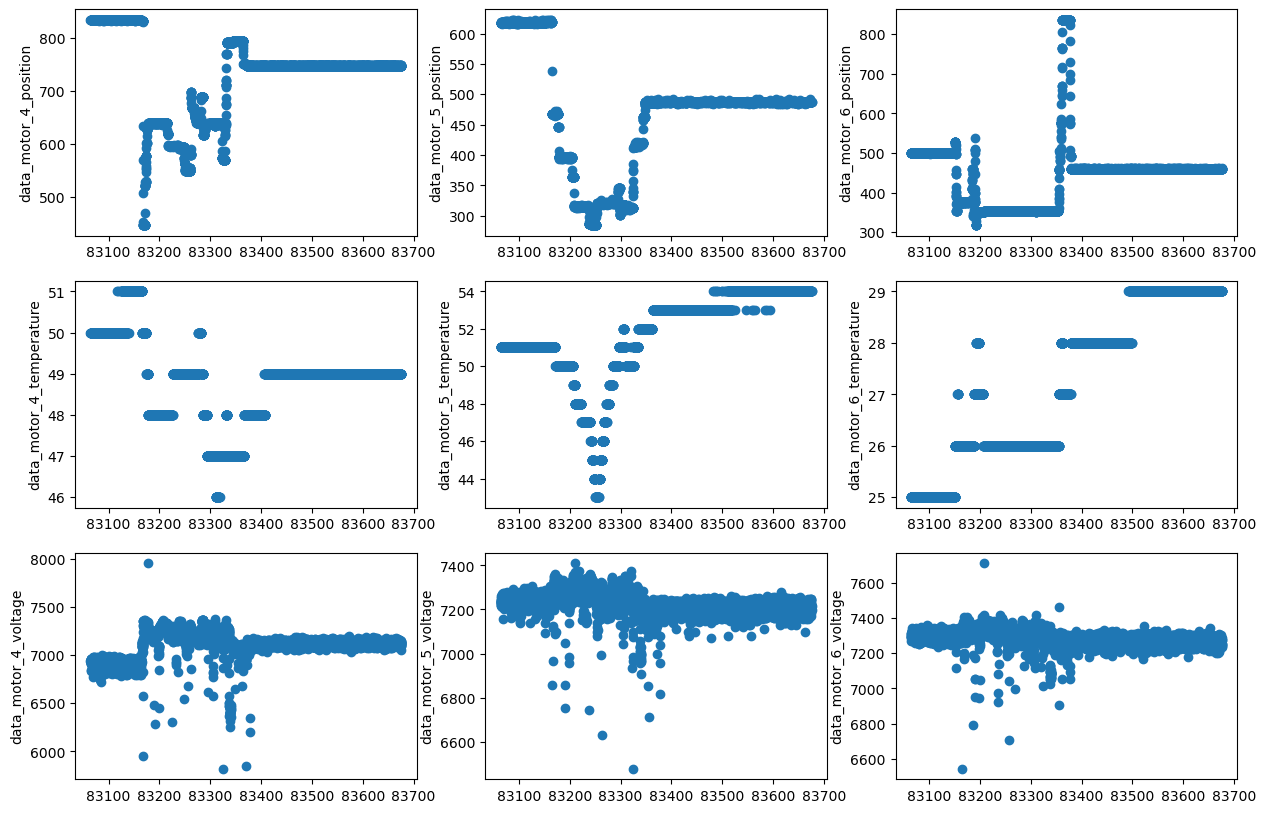

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



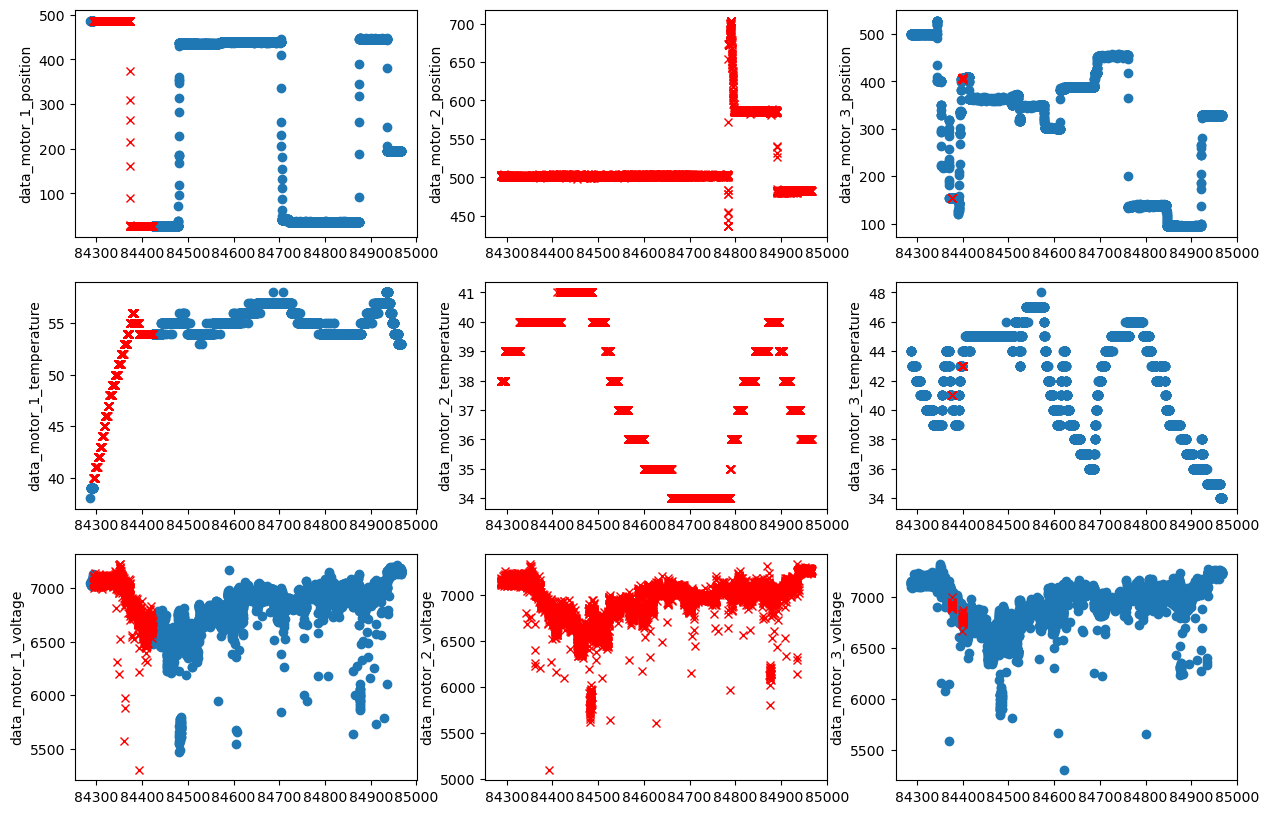

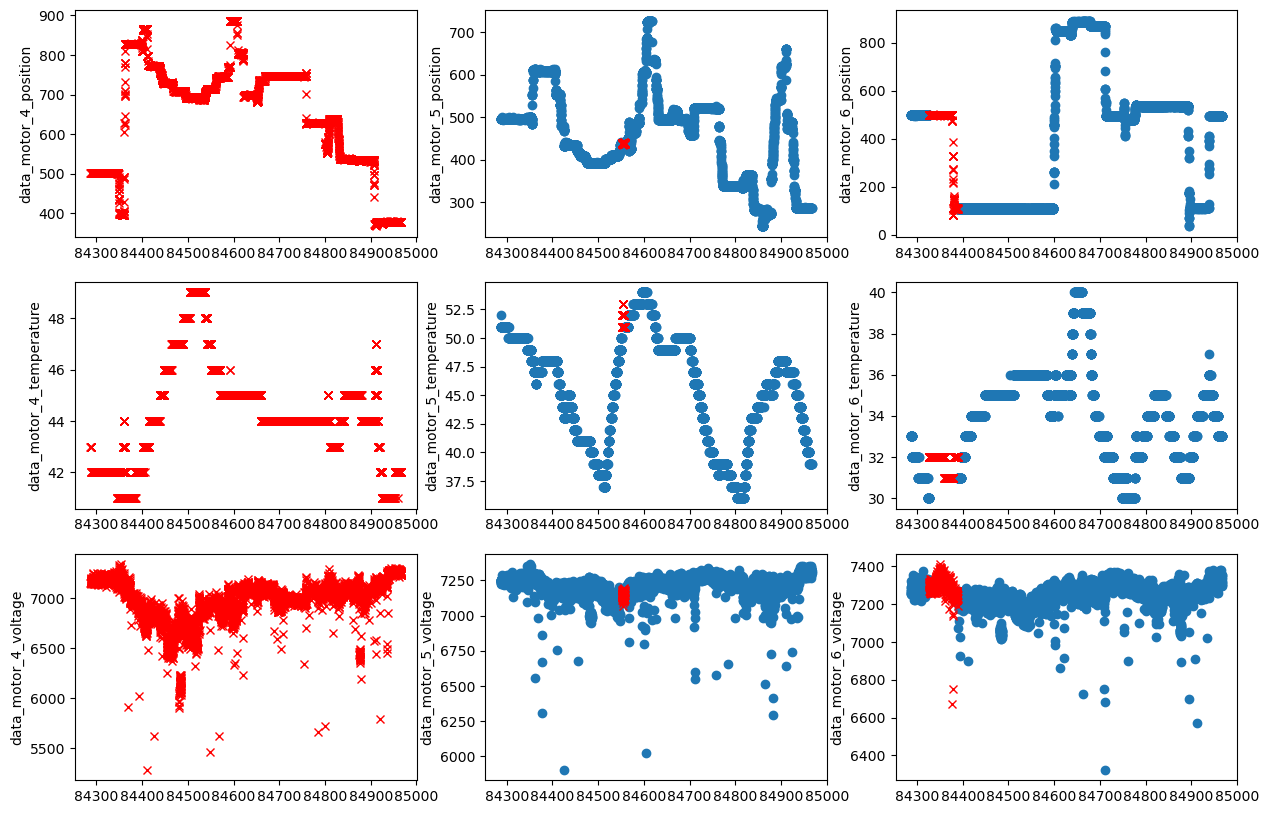

In [ ]:
from utility import read_all_test_data_from_path
import numpy as np
import pandas as pd


def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 5000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()


base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers)

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

Using the 20-datapoint window moving average, it is possible to smooth the data and save the result to the df.

In [ ]:
df_smoothed = df_normalized.rolling(window=20, min_periods=1).mean()
print(df_smoothed)

           time  data_motor_1_position  data_motor_1_temperature  \
0      0.000000               0.887035                  0.065789   
1      0.000006               0.887035                  0.065789   
2      0.000012               0.887035                  0.065789   
3      0.000018               0.887035                  0.065789   
4      0.000024               0.887035                  0.065789   
...         ...                    ...                       ...   
31130  0.999840               0.910377                  0.114035   
31131  0.999852               0.910377                  0.114035   
31132  0.999864               0.910377                  0.114035   
31133  0.999876               0.910377                  0.114035   
31134  0.999888               0.910377                  0.114035   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  0.963622                 0.0               0.979963   
1                  0.963125        

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

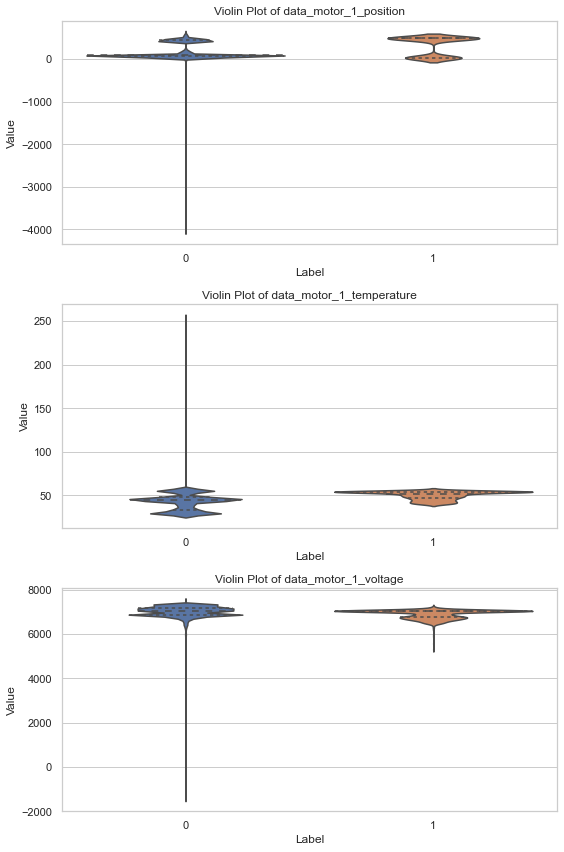

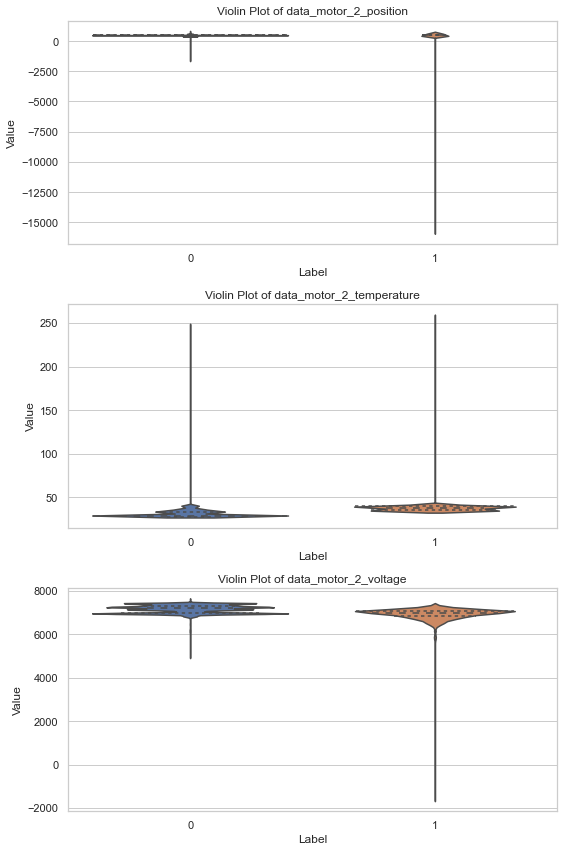

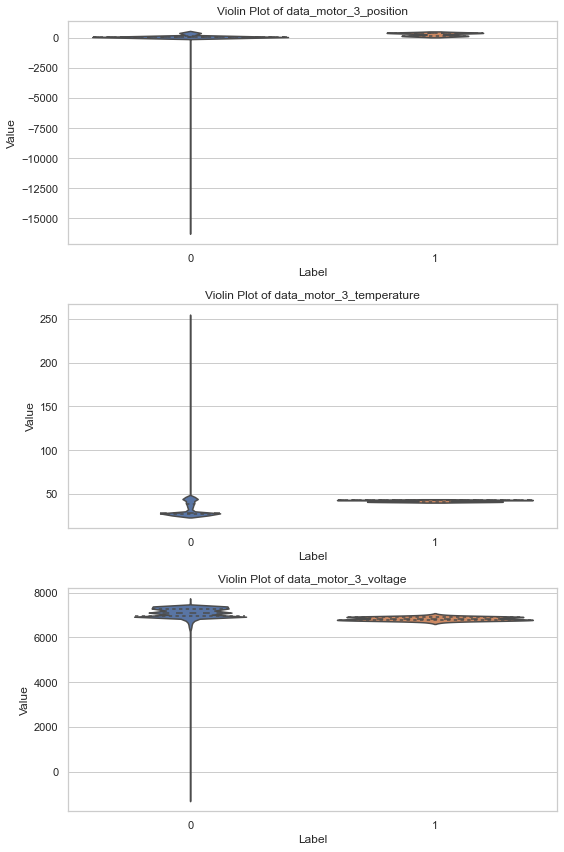

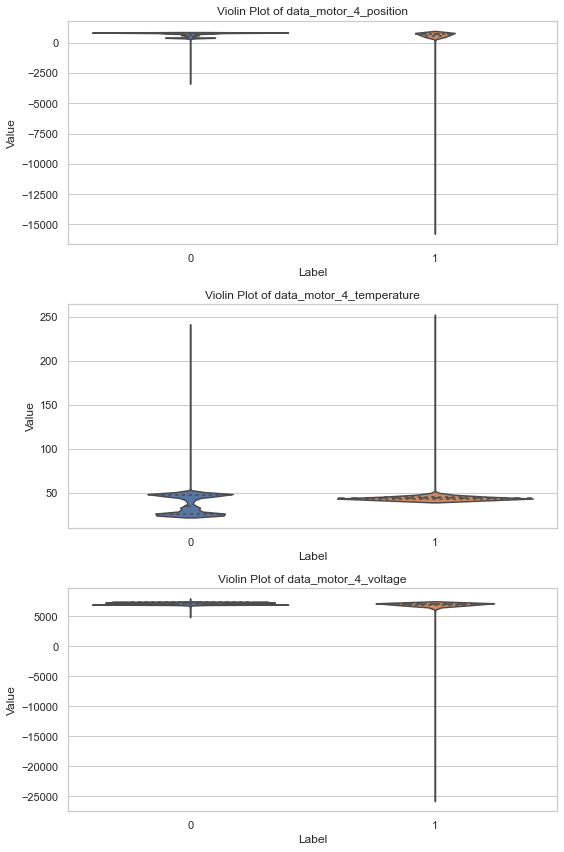

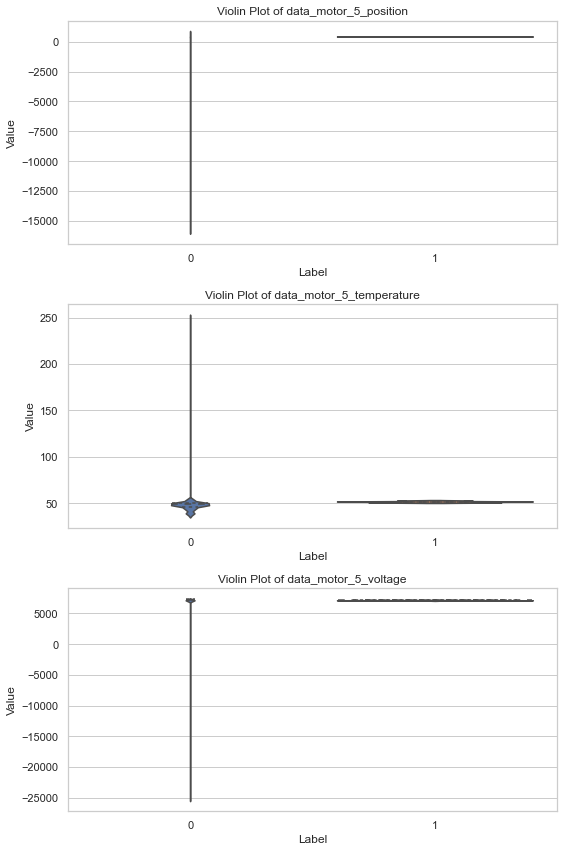

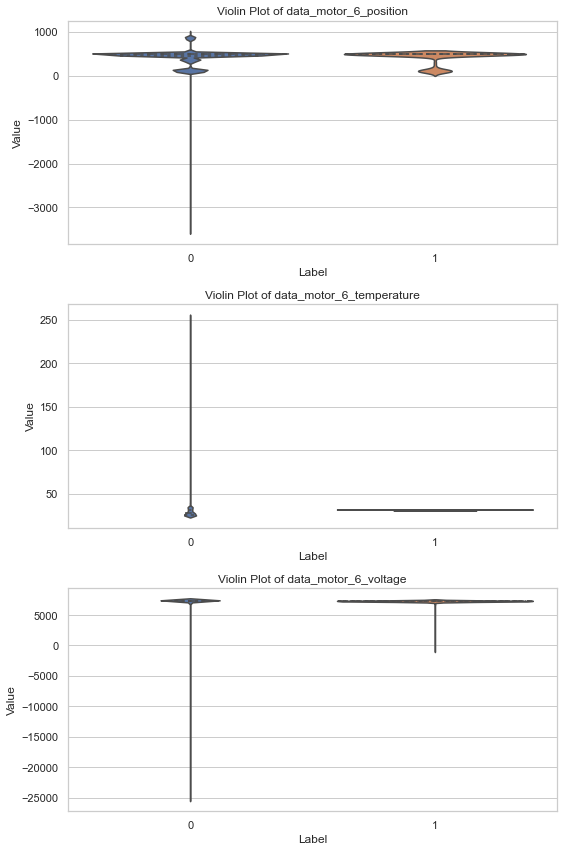

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to create violin plots for a given motor
def create_violin_plots_for_motor(df_data, motor_number):
    # Generate column names based on the motor number
    features = [f'data_motor_{motor_number}_position', 
                f'data_motor_{motor_number}_temperature', 
                f'data_motor_{motor_number}_voltage']
    
    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Create violin plots for the features of the specified motor
    fig, axes = plt.subplots(nrows=len(features), figsize=(8, 12))

    # Loop through the features and create a violin plot for each one
    for i, feature in enumerate(features):
        sns.violinplot(x=f'data_motor_{motor_number}_label', y=feature, data=df_data, ax=axes[i], inner='quartile')
        axes[i].set_title(f'Violin Plot of {feature}')
        axes[i].set_xlabel('Label')
        axes[i].set_ylabel('Value')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

# Iterate over motors 1 through 6 and create violin plots for each motor
for motor_number in range(1, 7):
    create_violin_plots_for_motor(df_data, motor_number)


A **violin plot** is a method of plotting numeric data and can be considered a combination of a box plot and a kernel density plot. It displays the distribution of the data across different levels of a categorical variable; in this case each motor´s position, temperature and voltage.

The left side of the violin plot represents data points with label 0 (when the motor is operating correctly) and the right side represents data points with label 1 (when the motor is failing).

The width of the violin at any given point indicates the estimated density of the data at that value. A wider section suggests higher density, meaning there are more data points clustered around that value. Conversely, a narrower section indicates lower density, meaning fewer data points are present. The graphs shown in task 1 can help to visualize when there is a higher density of data. 

Violin plots are typically symmetric, meaning that the density estimation is mirrored on either side of the axis. This symmetry helps to visually compare the distribution of data between different categories.
However, asymmetrical violin plots can also occur, especially when dealing with small sample sizes or non-standard distributions.

The height of the violin at any given point reflects the estimated density of data points at that particular value.
Where the violin is taller, the data is more densely populated, indicating that more data points have values around that point on the numerical axis.Conversely, where the violin is shorter, the data is less densely populated, indicating that fewer data points have values around that point.




## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

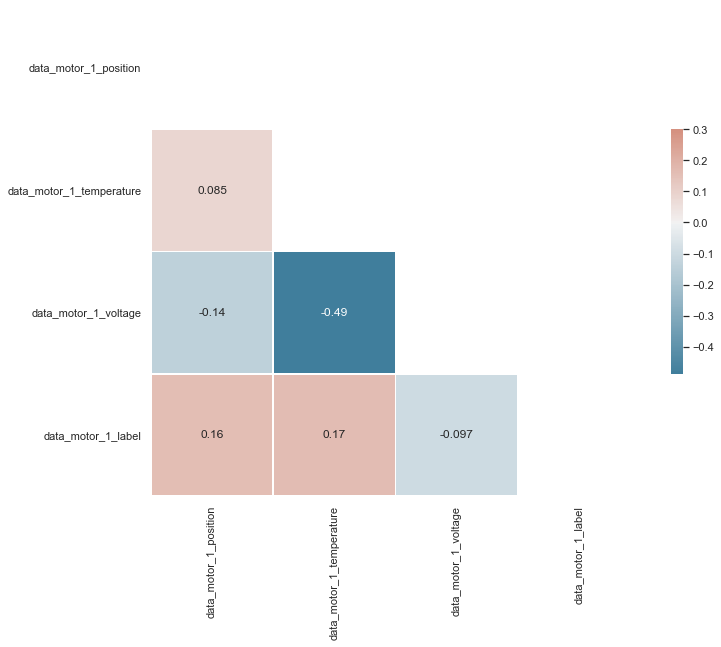

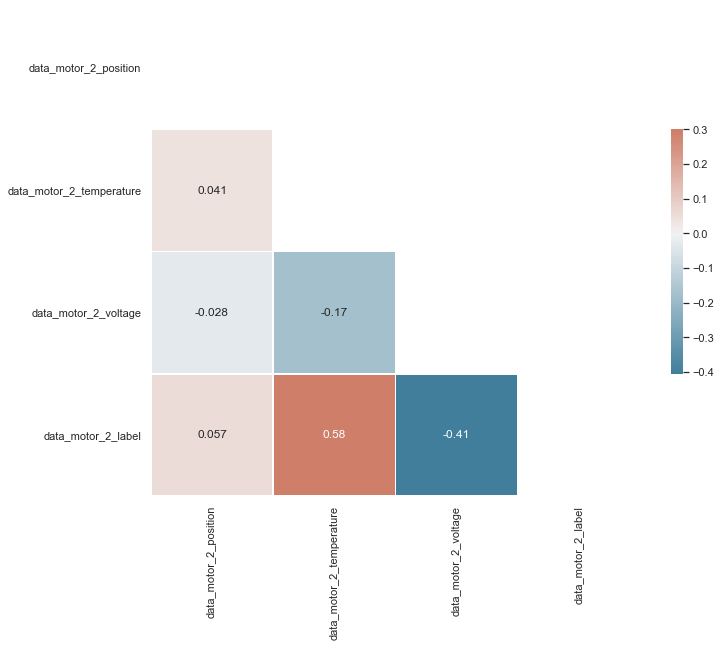

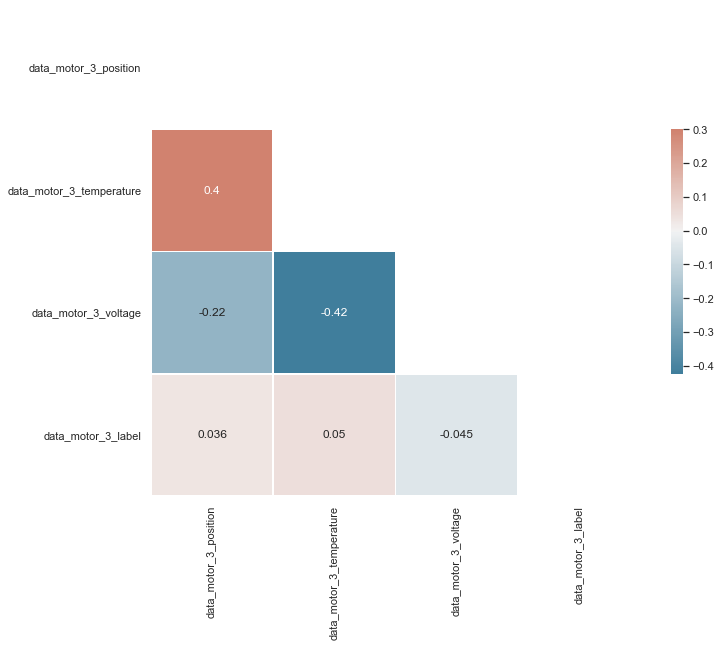

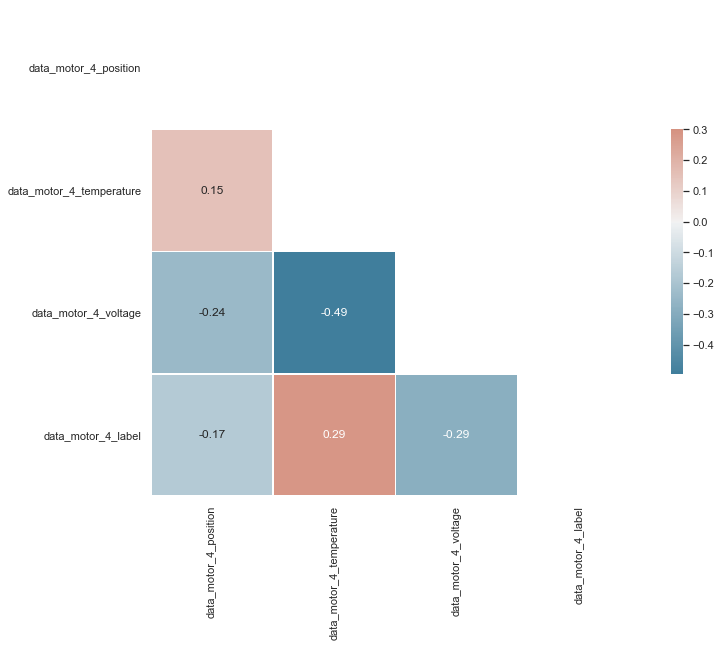

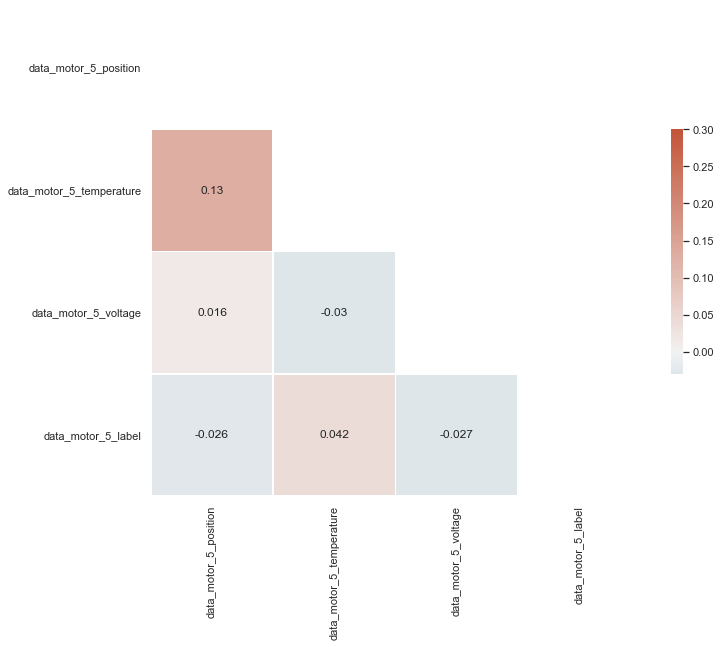

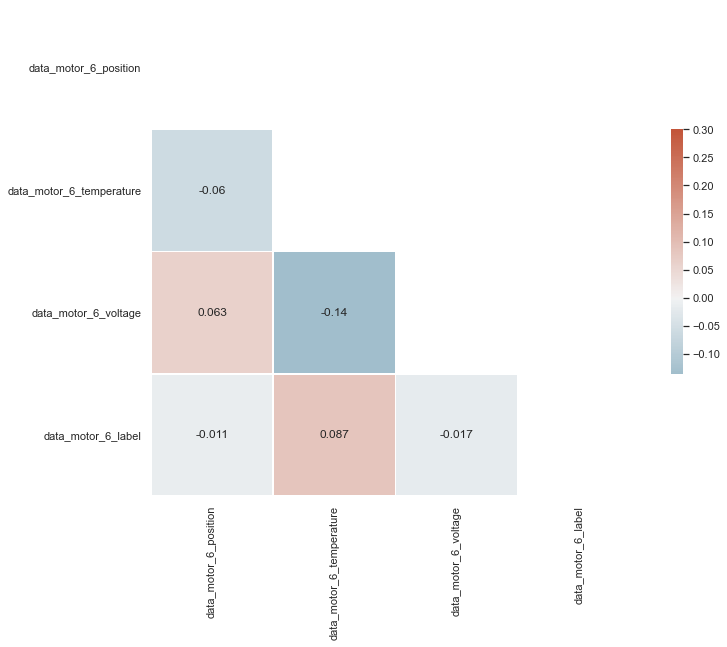

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Set the aesthetic style of the plots
    sns.set(style="white")

    # Create a mask to display only the lower triangle of the matrix (since it's symmetrical)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.show()

# Assuming df_data is your DataFrame with all the data
features_motor_1 = ['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage', 'data_motor_1_label']
df_motor_1 = df_data[features_motor_1]
plot_correlation_matrix(df_motor_1)

features_motor_2 = ['data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage', 'data_motor_2_label']
df_motor_2 = df_data[features_motor_2]
plot_correlation_matrix(df_motor_2)

features_motor_3 = ['data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage', 'data_motor_3_label']
df_motor_3 = df_data[features_motor_3]
plot_correlation_matrix(df_motor_3)

features_motor_4 = ['data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage', 'data_motor_4_label']
df_motor_4 = df_data[features_motor_4]
plot_correlation_matrix(df_motor_4)

features_motor_5 = ['data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage', 'data_motor_5_label']
df_motor_5 = df_data[features_motor_5]
plot_correlation_matrix(df_motor_5)

features_motor_6 = ['data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage', 'data_motor_6_label']
df_motor_6 = df_data[features_motor_6]
plot_correlation_matrix(df_motor_6)

<AxesSubplot:>

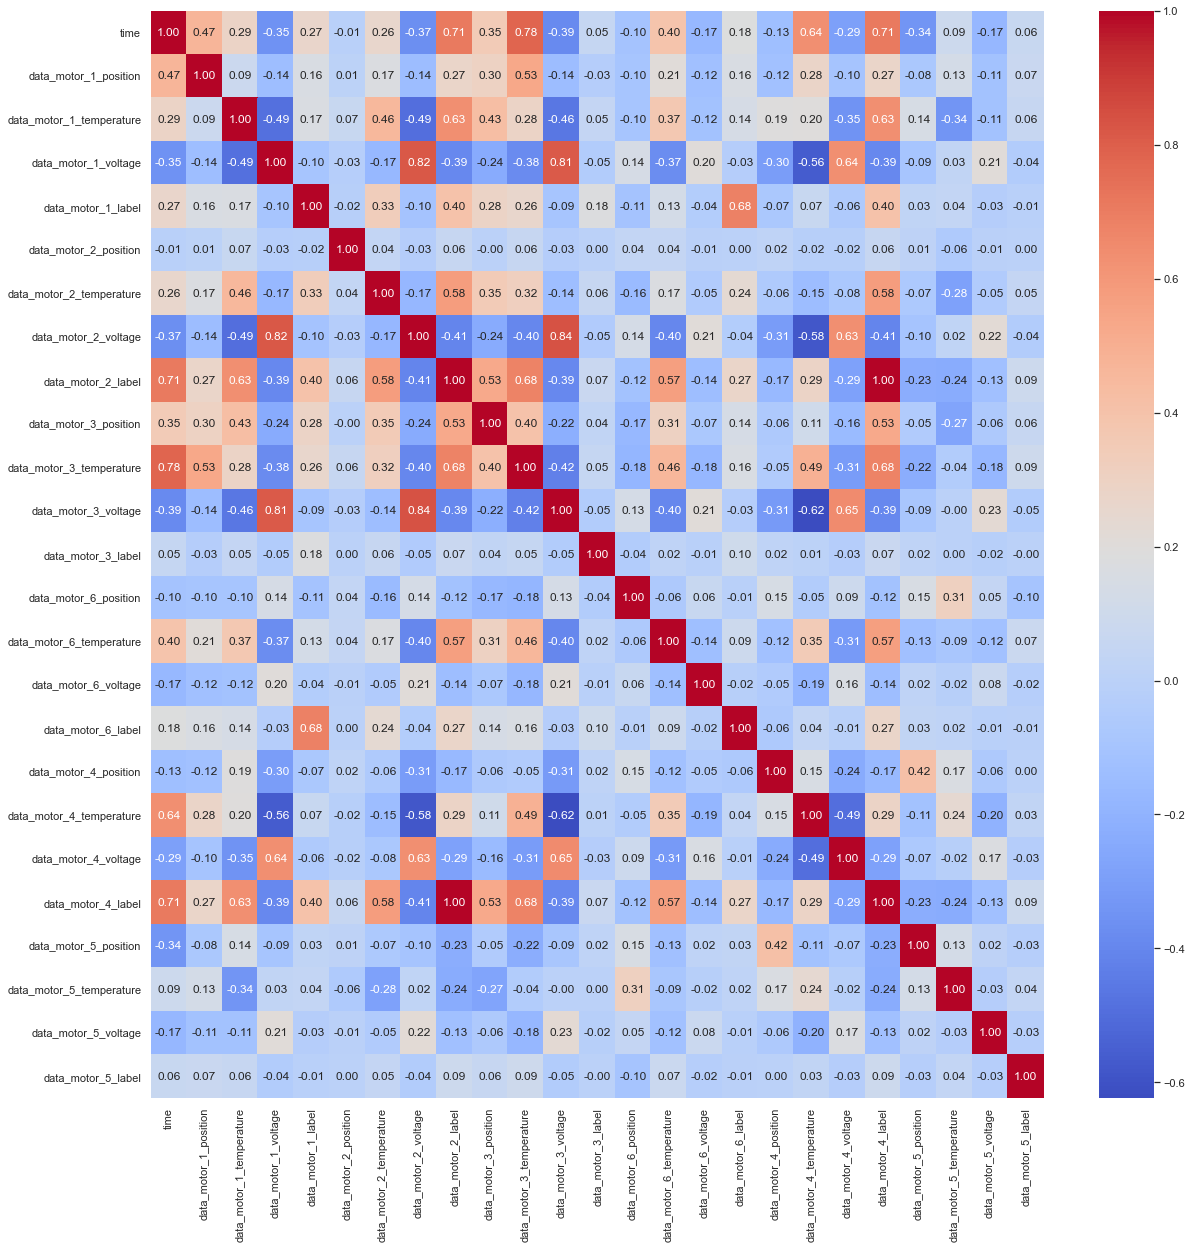

In [102]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We keep only numerical variables. Remove the labels and it is not relavent in this case.
# df_data_processed = df_data.drop(columns=['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label',
#                                         'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label', 'test_condition'])
df_data_processed = df_data.drop(columns=['test_condition'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the data and transform the data
df_data_processed = pd.DataFrame(data=scaler.fit_transform(df_data_processed), columns=df_data_processed.columns)

# Compute correlation matrix
correlation_matrix = df_data_processed.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(20, 20))  # Adjust width and height as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?




The most relevant features have been shown to be temperature, and then voltage. As regards the position did not really correlate to failure or not failure. This is why in the future, the priority for the features should be regarding firstly temperature, and then, showing less correlation, voltage.


A **correlation matrix** is a representation that displays the correlation coefficients between pairs of variables in a dataset. Each cell in the matrix contains a correlation coefficient, which measures the strength and direction of the linear relationship between two variables.

In our case, red represents stronger correlations while blue represents weaker correlations. We have six motors, each with temperature, voltage, and position data, the correlation matrix can help us understand how these variables are related within and across motors.

For instance, in many cases, there was a strong positive correlation between temperature and voltage across the motors which may suggest that as temperature increases, so does voltage, indicating a relationship between electrical resistance and heat generation.
A weak correlation between position and temperature may suggest that the physical position of the motor has minimal impact on its operating temperature.